#### **EDA (Exploración y Analisis de los Datos)**

**Análisis Exploratorio de Datos del Mercado de Internet en Argentina**

*En este Notebook se realiza un análisis exploratorio de datos (EDA) para identificar duplicados, valores faltantes, outliers y tendencias, así como generar gráficos adecuados para variables cualitativas y cuantitativas.*

### **Tabla de Contenidos**

1. Introducción
2. Importación de Librerías y Configuraciones
3. Carga, Revisión General y Descripción de los Datos
4. Limpieza y Preparación de Datos
5. Análisis Exploratorio (EDA)
6. Visualizaciones Clave y Discusión
7. Conclusiones del EDA

**1. [Introducción]**

•	Contexto: La industria de las telecomunicaciones en Argentina se encuentra en un constante crecimiento, con una adopción masiva de servicios de internet, telefonía móvil y otros medios de comunicación. Para el 2020, Argentina alcanzó alrededor de 62,12 millones de conexiones, ubicándose a la vanguardia a nivel regional.

•	Rol y Objetivo: Asumiendo el papel de Data Analyst para una empresa prestadora de servicios de telecomunicaciones, el objetivo es realizar un Análisis Exploratorio de Datos (EDA) y un dashboard que refleje el comportamiento del sector a nivel nacional y provincial. Este trabajo busca identificar oportunidades de mejora, planificar inversiones y optimizar la calidad de los servicios, con especial atención al acceso a internet y su penetración en hogares y habitantes.

En este sentido, se presentará un EDA detallado y un panel de visualizaciones (dashboard) que apoyen la toma de decisiones y permitan la evaluación de KPIs propuestos.

- [Estructura General Proyecto]

In [25]:
'''
# Estructura del Proyecto

mvp_pi2/
│
├── 📁 data/                    # 📂 Carpeta para almacenamiento general de los datos
│   ├── 📁 raw/                 # 📄 Datos originales (sin modificar)
│   ├── 📁 processed/           # 📄 Datos limpios y listos para análisis
│
├── 📁 virtualenv/              # 📂 Carpeta para almacenamiento de la data del entorno virtual
├── ETL.ipynb                   # 📊 Notebook para Exploración, Transformación y Carga inicial
├── EDA.ipynb                   # 📊 Notebook para Análisis exploratorio            
│
├── functions.py                # 📄 Compendio de Funciones usadas en el ETL y EDA
│
├── requirements.txt            # 📋 Lista de librerias y dependencias requeridas
├── .gitignore                  # 🚫 Archivos/carpetas a ignorar en Git
├── README.md                   # 📖 Descripción general del proyecto
└── Dashboard_KPI_PI_2.pbix     # 📊 Archivo de Power BI con el Dashboard
'''
print("Componentes de la estructura del proyecto:")

Componentes de la estructura del proyecto:


- **EDA.ipynb:** Notebook del EDA, en este archivo se lleva a cabo todo el análisis exploratorio de datos (EDA), 
Carga de los datasets, Limpieza y preparación (tratamiento de duplicados, valores faltantes, outliers, etc.),
Creación de nuevas variables (por ejemplo, tasas de crecimiento y ARPU), Visualizaciones y análisis de tendencias,
distribuciones y correlaciones, Conclusiones preliminares y recomendaciones.

- **ETL.ipynb:** Notebook del ETL, en este archivo se lleva a cabo la extracción, transformación y carga de los datos,
Extracción de los datos de las fuentes originales (por ejemplo, archivos CSV, bases de datos, APIs, etc.),
Limpieza y transformación de los datos (por ejemplo, unificación de formatos, normalización de variables, etc.),
Generación de datasets finales listos para el análisis, Guardado de los datasets en la carpeta data/processed/.

- **data/:** Carpeta que contiene los datasets originales (data/raw/) y los datasets procesados (data/processed/), 
Permite mantener una organización clara de los datos y facilita la reproducibilidad del análisis.

- **virtualenv/:** Carpeta que contiene los archivos del entorno virtual, Permite aislar las dependencias del proyecto
y garantizar la reproducibilidad del análisis.

- **requirements.txt:** Archivo que contiene la lista de librerías y dependencias necesarias para ejecutar el proyecto,
Facilita la instalación de las librerías necesarias en un entorno virtual o en un servidor de producción.

- **functions.py:** Contiene las funciones auxiliares para procesar y analizar la información (por ejemplo, funciones
de validación, creación de columnas o generación de gráficos), Permite una mejor organización y reutilización del código.

- **Dashboard_KPI_PI_2.pbix:** Carpeta que incluye el archivo de Power BI donde se desarrolla el panel interactivo.
Se presentan las principales visualizaciones y KPIs de forma clara y ordenada, con filtros y segmentaciones que
facilitan la exploración de los datos.

- **README.md:** Documento base del repositorio que describe en un nivel alto el proyecto, sus objetivos y la forma de
reproducir los análisis, Explica brevemente la estructura del proyecto, indicando dónde se encuentran los datasets,
el EDA, el dashboard y otros elementos relevantes, Incluye un reporte conciso de los hallazgos principales y de la
funcionalidad de los KPIs implementados.

**2. [Importación de Librerías y Configuraciones]**

In [86]:
import pandas as pd # Importamos librería pandas
import numpy as np # Importamos librería numpy
import ast # Importamos librería ast
from datetime import datetime # Importamos librería datetime
from functions import * # Importamos todas las funciones contenidas en archivo functions.py

*3. [Carga, Revisión General y Descripción de los Datos]**
   - [Lectura de Archivos]

In [87]:
opciones_impresion() # Invocamos la función para mejorar la impresion y que no se recorte la información al imprimir.
# [Lectura de Archivos] importamos los archivos .parquet resultantes del ETL:
df_internet_nacional = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_nacional.parquet')
df_internet_provincias = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_provincias.parquet')

   - [Vista Rápida del Dataset, Tipos de Datos, Dimensiones, Estadística Descriptiva y Columnas Principales]

In [88]:
# Usamos la funcion validar_df para obtener una vista rápida de los datasets:
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_nacional", df_internet_nacional.shape),"\n",validar_df(df_internet_nacional),"\n", df_internet_nacional.head(20),"\n", df_internet_nacional.tail(22),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_provincias", df_internet_provincias.shape),"\n",validar_df(df_internet_provincias),"\n", df_internet_provincias.head(4),"\n", df_internet_provincias.tail(4),"\n")
print("\n")

El dataframe df_internet_nacional tiene una dimensión de: (42, 25) 
                             Tipo de Dato Int Int64 Float Bool DateT Str Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness  Kurtosis   Media            Desviación_Std   Moda           Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos IQR              %OutL_IQR LowerBound        UpperBound        Z-Score   %OutL_Z_Thresh
Año                             int64     42  0      0    0    0      0  NaN    0     42       11       0   NaN             0.024172  -1.186795      2018.761905         3.074756           2014           2014          2016.0           2019.0           2021.0          2024    0                   5.0    0.0               2001.0            2036.0  1.724231    0.0        
Trimestre                       int64     42  0      0    0    0      0  NaN    0     42        4       0   NaN             0.070729  -1.371727         2.452381          1.13056              

**4. [Limpieza y Preparación de Datos]**
  - En el proceso de preparacion de datos creamos un campo "Fecha" con ayuda de los campos "Año" y "Trimestre" y se le hace casting a tipo "datetime", adicionalmente s ele ordena de forma ascendente (de menor a mayor)
  - [Detección y Tratamiento de Duplicados, Nulls, Ceros, Infinitos, Vacios, Imputaciones, Casting]:
En la fase de ETL se revisaron los dataframe crudos del archivo df_internet y se identificó:
    - En el campo "Año" en varias hojas se encontraron inconsistencias en su digitación y contenido (*, texto, años que no han ocurido) por lo cual se realizo normalización de texto y casting a tipo "int64" con lo cual se estandarizó el campo.
    - El campo "Provincia" se le realizó tratamiento a sus textos homogenizandolos a estilo capital, eliminando redundnacias entre Siglas y nombres como por ejemplo "CABA" o "Caba" rpor "Capital Federal" y se le realizó casting a tipo "Category" ya que igualmente es una variable tipo Categorica nominal.
    - En esta fase de EDA se identificaron varios campos con multiples Null para los cuales se les imputo con el valor de la media aritmetica:
      campos_a_imputar =["Tot_Vel_Media_DL_Trim_x_Prov","Tot_Acc_ADSL_x_Prov","Tot_Acc_CaModem_x_Prov",
      "Tot_Acc_FO_x_Prov","Tot_Acc_Wireless_x_Prov","Tot_Acc_Otros_x_Prov","Tot_Acc_x_Prov",
      "Tot_pntrcion_x_c100_Habi_x_Prov","Tot_pntrcion_x_c100_Hoga_x_Prov","Tot_Acc_rango_0->512_kbps_x_Prov",
      "Tot_Acc_rango_0.512->1_Mbps_x_Prov","Tot_Acc_rango_1->6_Mbps_x_Prov","Tot_Acc_rango_6->10_Mbps_x_Prov",
      "Tot_Acc_rango_10->20_Mbps_x_Prov","Tot_Acc_rango_20->30_Mbps_x_Prov","Tot_Acc_rango_>30_Mbps_x_Prov",
      "Tot_Acc_rango_Otros_Mbps_x_Prov","Tot_Acc_rango_Mbps_x_Prov".

      - Se crea la columna "Fecha" con ayuda de los campos "Año" y "Trimestre" y se le hace casting a tipo "datetime", adicionalmente s ele ordena de forma ascendente (de menor a mayor)
      - Valores nulos y duplicados: Se descarta duplicidad en los datos Categoricos de las Provincias, en el caso de los datos nulos son pocas las ocurrencias.
      
   
   

In [35]:
from functions import *
# Creamos la columna "Fecha" en el DataFrame "df_internet_nacional" para su uso en los graficos de series temporales:
df_internet_nacional = crear_fecha_trimestral_df(df_internet_nacional,"Año","Trimestre")

# Creamos la columna "Fecha" en el DataFrame "df_internet_provincias" para su uso en los graficos de series temporales:
df_internet_provincias = crear_fecha_trimestral_df(df_internet_provincias,"Año","Trimestre")



- Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov, Tot_Acc_ADSL_x_Prov, Tot_Acc_CaModem_x_Prov, Tot_Acc_FO_x_Prov, Tot_Acc_Wireless_x_Prov, Tot_Acc_Otros_x_Prov, Tot_Acc_x_Prov, Tot_Acc_rango_0->512_kbps_x_Prov, Tot_Acc_rango_0.512->1_Mbps_x_Prov, Tot_Acc_rango_1->6_Mbps_x_Prov, Tot_Acc_rango_6->10_Mbps_x_Prov, Tot_Acc_rango_10->20_Mbps_x_Prov, Tot_Acc_rango_20->30_Mbps_x_Prov, Tot_Acc_rango_>30_Mbps_x_Prov, Tot_Acc_rango_Otros_Mbps_x_Prov, Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" por el metodo kNN ya que son campos que por su valor de Kurtosis y Skewness se deduce tienen una distribucioon fuertemete asimetrica:

In [ ]:
# Lista de campos del df_internet_provincias con alta Kurtosis (>3) y Skewness (>1):

campos_a_imputar_kNN = [
    "Tot_Vel_Media_DL_Trim_x_Prov",
    "Tot_Acc_ADSL_x_Prov",
    "Tot_Acc_CaModem_x_Prov",
    "Tot_Acc_FO_x_Prov",
    "Tot_Acc_Wireless_x_Prov",
    "Tot_Acc_Otros_x_Prov",
    "Tot_Acc_x_Prov",
    "Tot_Acc_rango_0->512_kbps_x_Prov",
    "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
    "Tot_Acc_rango_1->6_Mbps_x_Prov",
    "Tot_Acc_rango_6->10_Mbps_x_Prov",
    "Tot_Acc_rango_10->20_Mbps_x_Prov",
    "Tot_Acc_rango_20->30_Mbps_x_Prov",
    "Tot_Acc_rango_>30_Mbps_x_Prov",
    "Tot_Acc_rango_Otros_Mbps_x_Prov",
    "Tot_Acc_rango_Mbps_x_Prov"
]
# Imputamos valores nulos de los campos con alta Kurtosis y Skewness con la tecnica kNN del df_internet_provincias:
imputador_k_NN(df_internet_provincias, campos_a_imputar_kNN, k=5, weights="uniform")

- Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Hoga_x_Prov" con su media por mostrar una distribucion simetrica deducida de su kurtosis(<3), skewness(≈0), grafico de caja y bigotes:


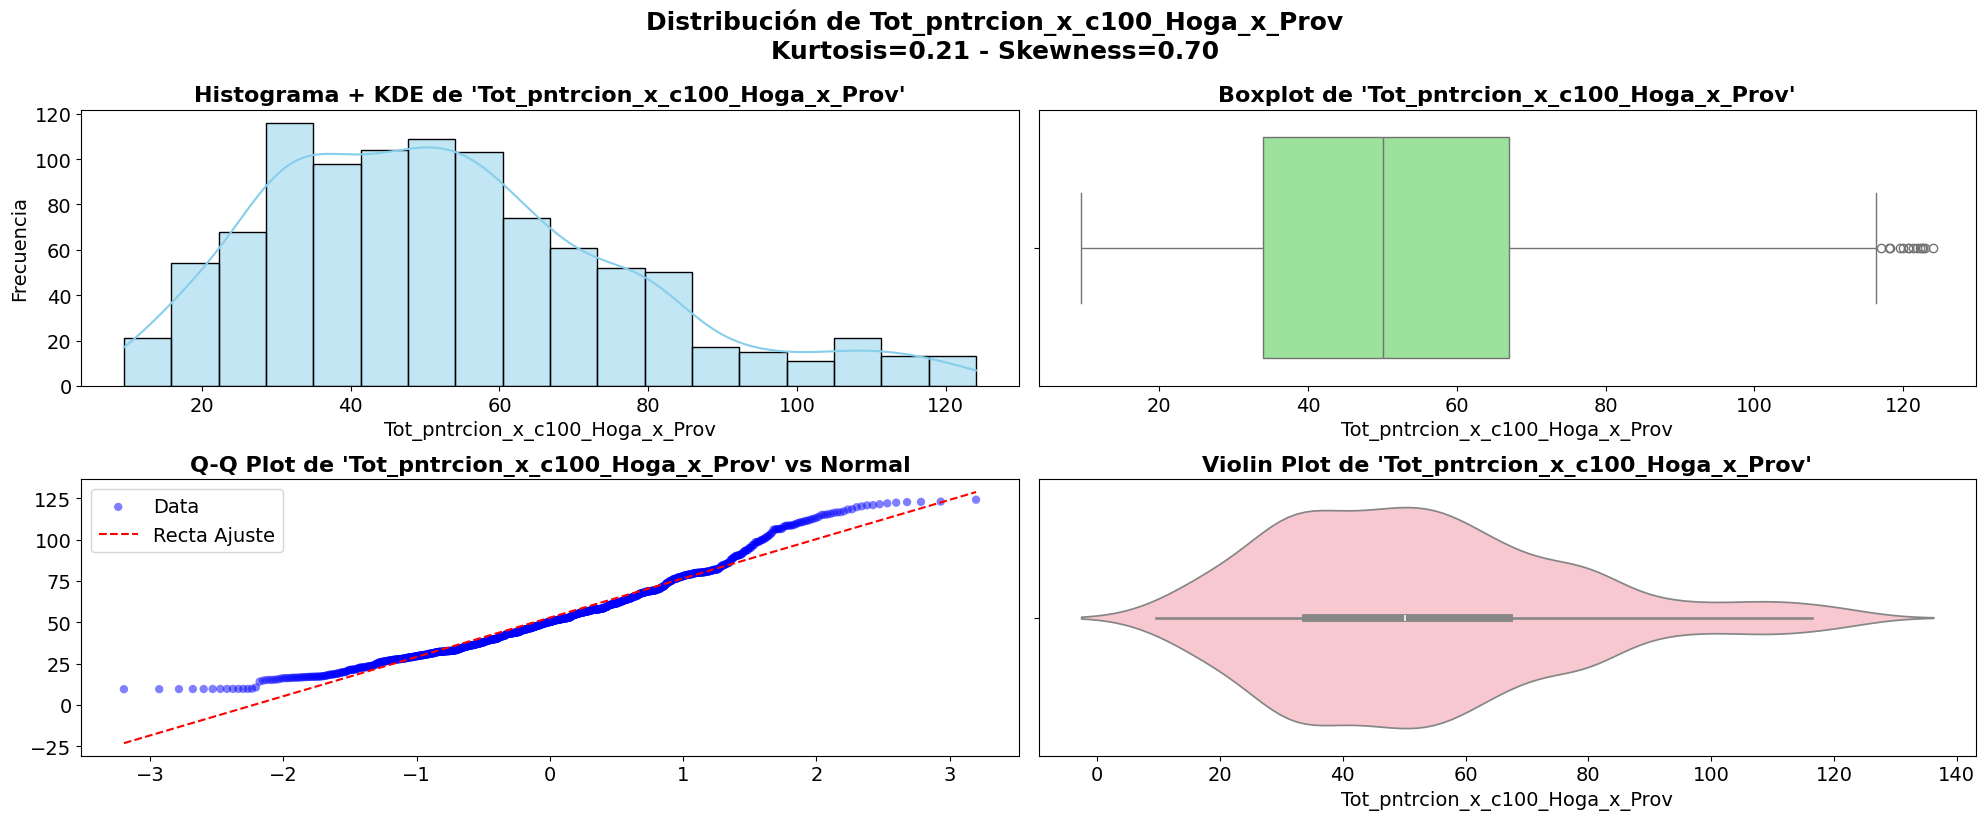

In [90]:
visualizacion_distribucion(df_internet_provincias, "Tot_pntrcion_x_c100_Hoga_x_Prov", titulo="Distribución de Tot_pntrcion_x_c100_Hoga_x_Prov")
# Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Hoga_x_Prov" con su media por mostrar una distribucion simetrica:
df_internet_provincias = imputar_valor(df_internet_provincias, ["Tot_pntrcion_x_c100_Hoga_x_Prov"], metodo="media")

- Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Habi_x_Prov" con su mediana por mostrar una distribucion asimetrica deducida de su kurtosis(2.85<3) y skewness(≈1.51), y representacion grafica:

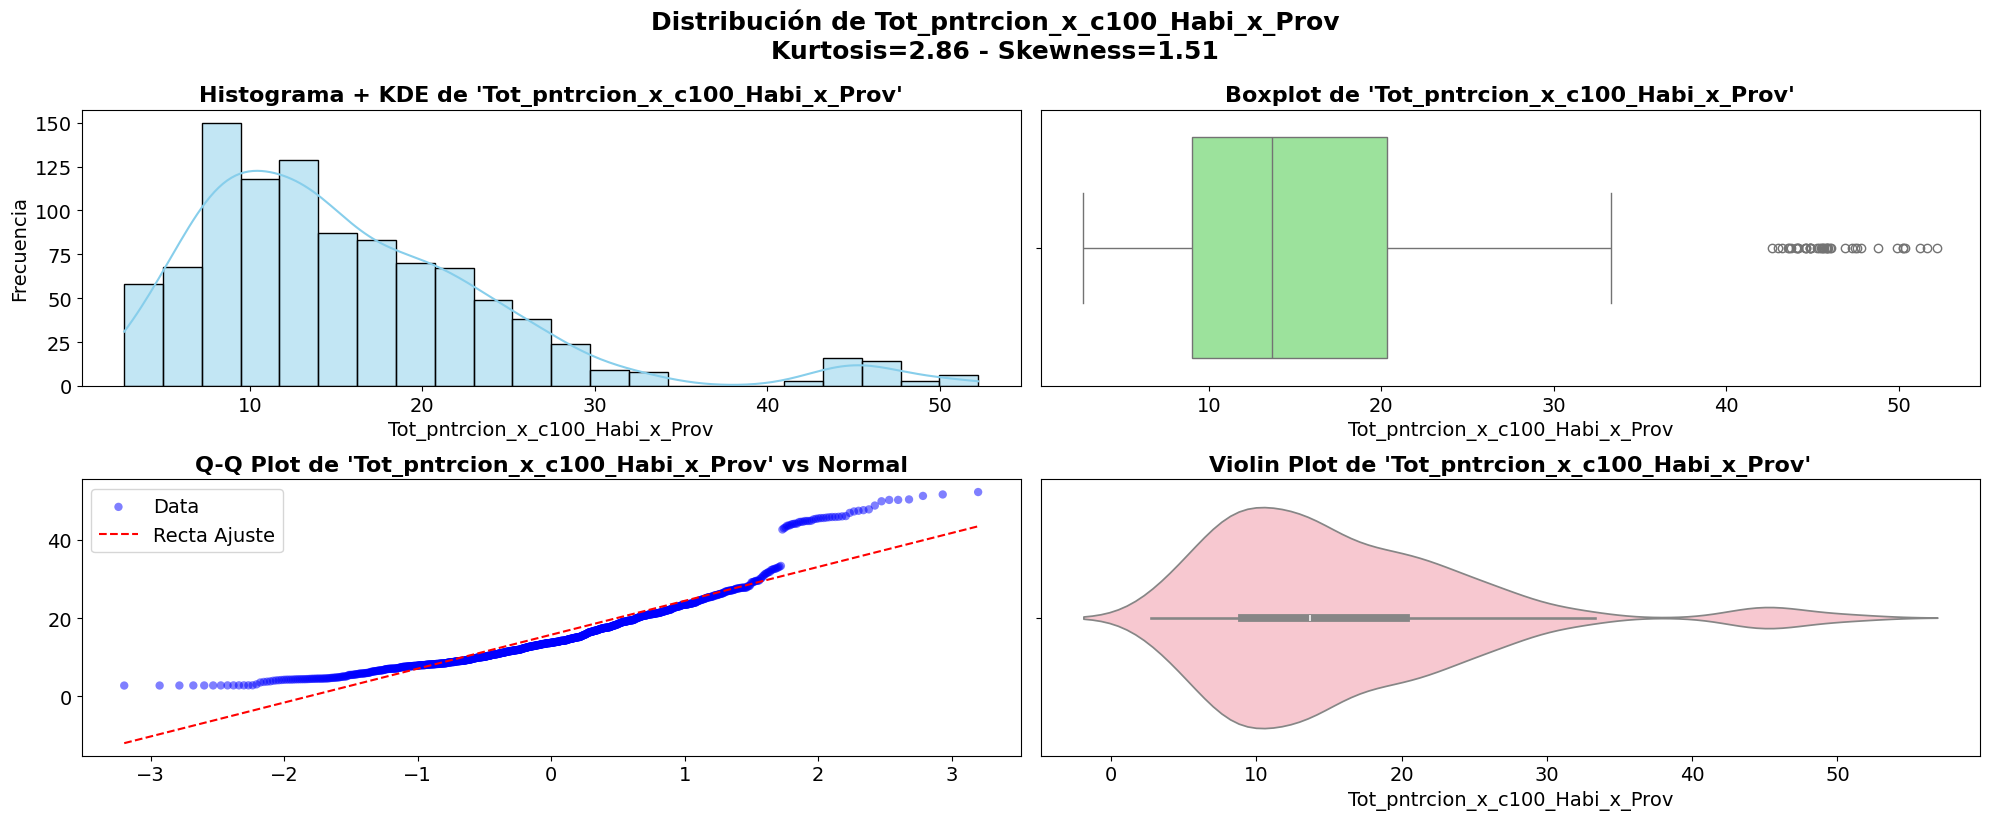

In [91]:
visualizacion_distribucion(df_internet_provincias, "Tot_pntrcion_x_c100_Habi_x_Prov", titulo="Distribución de Tot_pntrcion_x_c100_Habi_x_Prov")
# Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Habi_x_Prov" con su mediana por mostrar una distribucion fuertemente asimetrica:
df_internet_provincias = imputar_valor(df_internet_provincias, ["Tot_pntrcion_x_c100_Habi_x_Prov"],metodo="mediana")

In [92]:
print(validar_df(df_internet_provincias)) # Validamos el DataFrame df_internet_provincias luego de las imputaciones de nulos

                                   Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos IQR        %OutL_IQR LowerBound UpperBound  Z-Score    %OutL_Z_Thresh
Año                                    int64     1032  0        0  0    0        0   NaN   0     1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0             6.0     0.0       1998.0      2040.0   1.648044    0.0        
Trimestre                              int64     1032  0        0  0    0        0   NaN   0     1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874          1         1        1.0        2.0        4.0           4    0             3.0     0.0         -8.0        13.0   1.339708    0.0        
P

- [Tratamiento de Outliers]: Se valida con los indicadores de Kurtosis y Skewness la tendencia de su distribución y posteriormente validamos bajo las tecnicas de IQR y Z-Score la presencia de posibles outliers. Para los casos donde la kurtosis es mayor a 3 y el valor absoluto de skewness es mayor a 1 se sabe que hay una distribución fuertemente asimetrica, cuando esto ocurre entonces lo mas acertado a usar el Rango Intercuartílico (IQR) con un factor de 1.5 para escenario no tan exigentes y 3 para escenarios mas exigentes, ahora si la kurtosis es menor a 3 y el valor absoluto de skewness es menor a 1 se sabe que hay una distribución normal, cuando esto ocurre entonces lo mas acertado a usar es el Z-Score con un factor de 3 para escenario no tan exigentes y 5 para escenarios mas exigentes. En este caso como no usaremos algoritmos de ML en el desarrollo de algun entrenamiento entonces graficaremos las ditribuciones de dos campos con valores de kurtosis y skewness altos pero no eliminaré valores que pudiesen parecer outliers ya que la data obedece a datos estadisticos oficiales que en teoría han reflejado la realizadas del acceso y penetración del servicio de internet en el pais. Para esta revision usaremos los campos "Tot_Acc_ADSL_x_Prov" y "Tot_Acc_x_Prov":

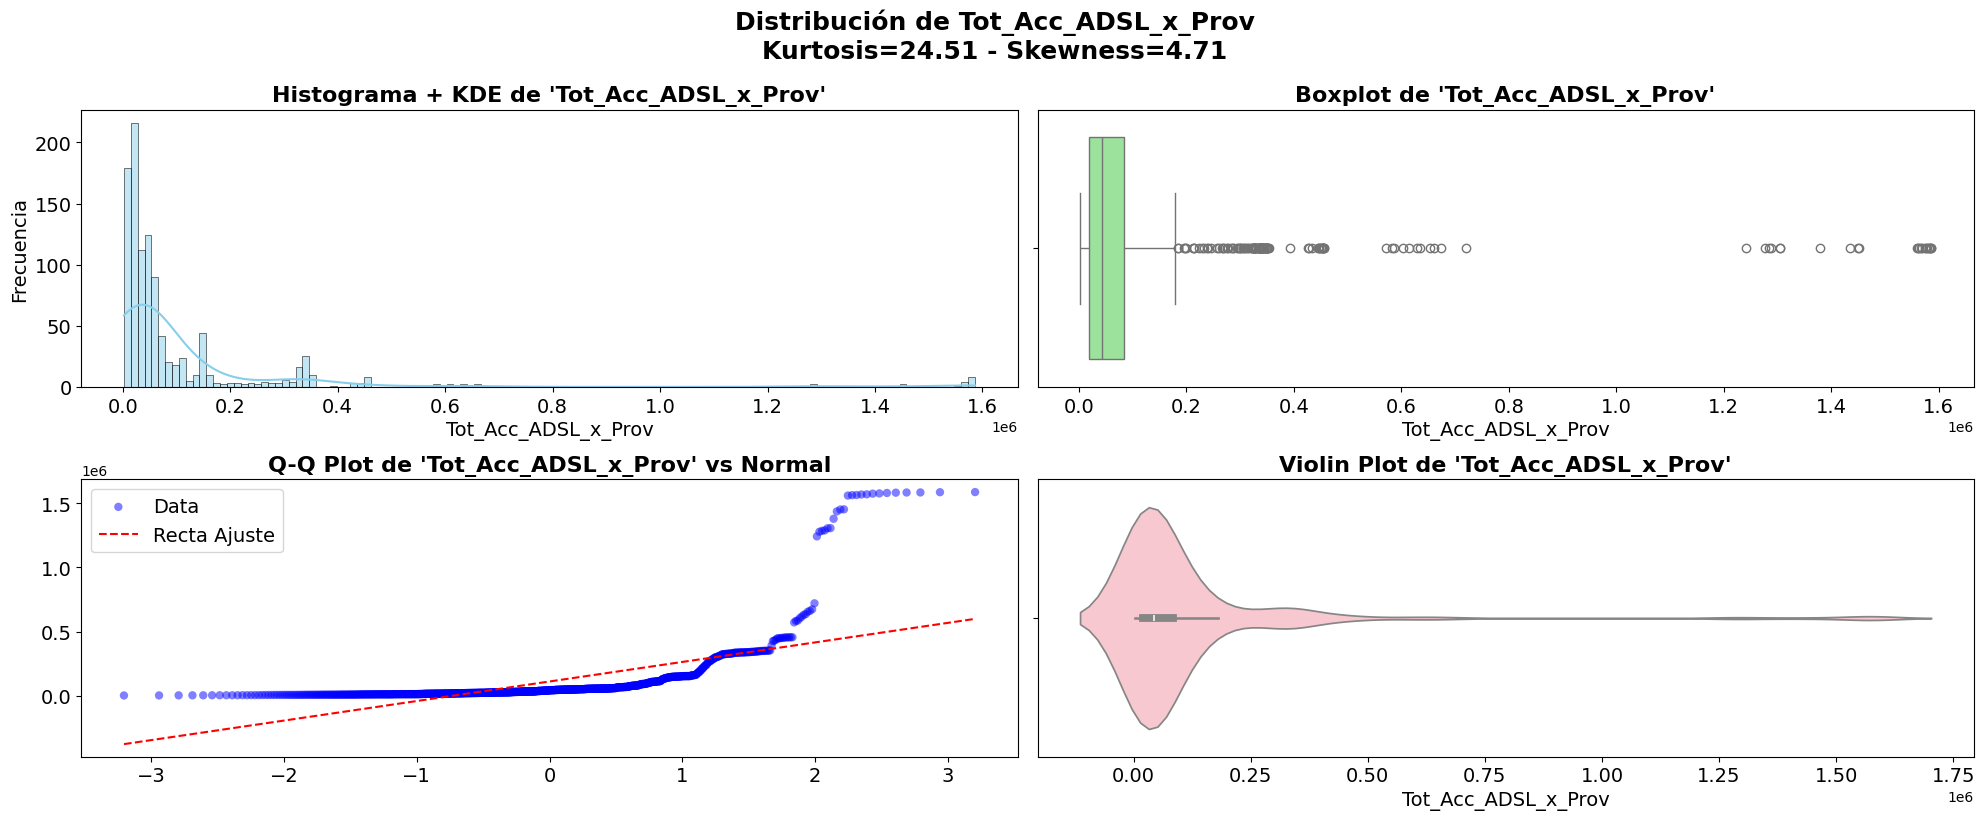

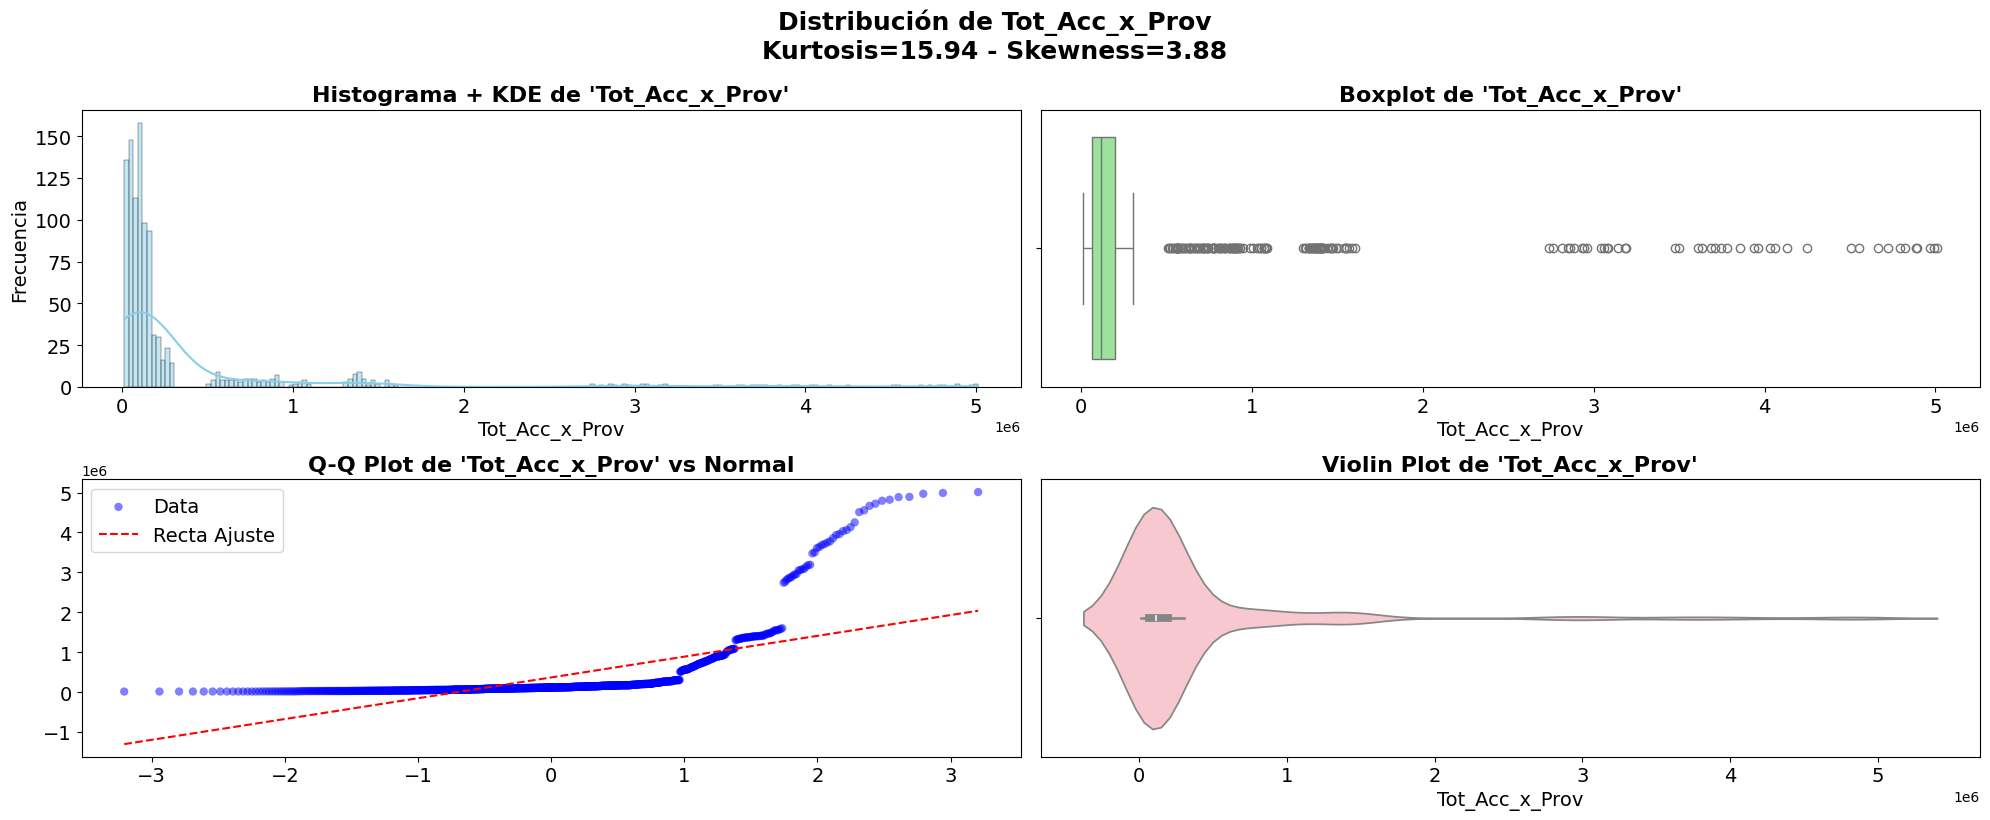

In [93]:
visualizacion_distribucion(df_internet_provincias, "Tot_Acc_ADSL_x_Prov", titulo="Distribución de Tot_Acc_ADSL_x_Prov")
visualizacion_distribucion(df_internet_provincias, "Tot_Acc_x_Prov", titulo="Distribución de Tot_Acc_x_Prov")

- [Tratamiento de Duplicados y Valores Faltantes]: En el caso de los campos "Año", "Trimestre" y "Provincia" se valida con la funcion "validar_df" las cantidades de datos unicos reflejan la realizada de la cantidad de años en el rango de 2014 a 2024, igualmente los cuatro trimestres y las 24 Provincias, para este ultimo campo ya en el ETL se habia realizado laidentificacion de nombres redundantes y se normalizaron.
A nivel de campos vacios o datos faltantes igualmente se validó en el ETL antes de fusionar hojas con campos comunes que la hoja "Accesos Por Tecnología" presentava unos campos vacios y obedecian a que en el excel adicionarion un comentario general dos filas despues de la data lo cual generaba ese efecto por lo cual se procedio a eliminar esas filas al final de la hoja.

- [Análisis Univariado]: Se realizó un análisis univariado de cada variable, con el fin de identificar patrones, tendencias y valores atípicos. Se utilizaron gráficos de caja y bigotes, histogramas y gráficos de densidad para visualizar la distribución de los datos.

    - [Revision de tipos de datos, tipos de variables]: En el proceso de ETL se había identificado la necesidad de unificar hojas del archivo de Excel original por compartir estructuras, dimensiones y campos; por ello, de forma previa, se realizó un casting a cada hoja según el contenido de cada campo. De este modo, se llegó a la conclusión de formatear las cifras y datos de acceso, penetración y velocidades de internet como tipo “float”.
En el caso de los años y trimestres, se determinó que debían ser tipo “int” (variables numéricas discretas).
Los nombres de las Provincias se definieron como tipo “category”, considerándose variables categóricas ordinales.
Por último, cabe recalcar que los datos de años y trimestres son variables numéricas discretas, mientras que el resto de los campos, al representar cantidades continuas, se representaron en float.

- **[5.2 Análisis Bivariado y Multivariado]**
En esta fase el análisis de correlaciones se centra en la relación lineal entre las variables numéricas (int y float) que tenemos en los campos de los "df_internet_nacional" y "df_internet_provincias."
	- Cálculo de la matriz de correlación: se suele utilizar el método de Pearson (o Spearman, según la distribución de los datos) para evaluar la fuerza y dirección de la asociación.
	- Visualización: un heatmap de correlaciones (matriz de calor) resulta muy útil para identificar rápidamente patrones e asociación.
	•	Interpretación:
	•	Valores cercanos a 1 o -1 indican correlaciones fuertes (positivas o negativas, respectivamente).
	•	Valores cercanos a 0 indican que no existe (o es muy débil) la correlación lineal.
     - [Correlaciones]
     - [Relaciones Categóricas]

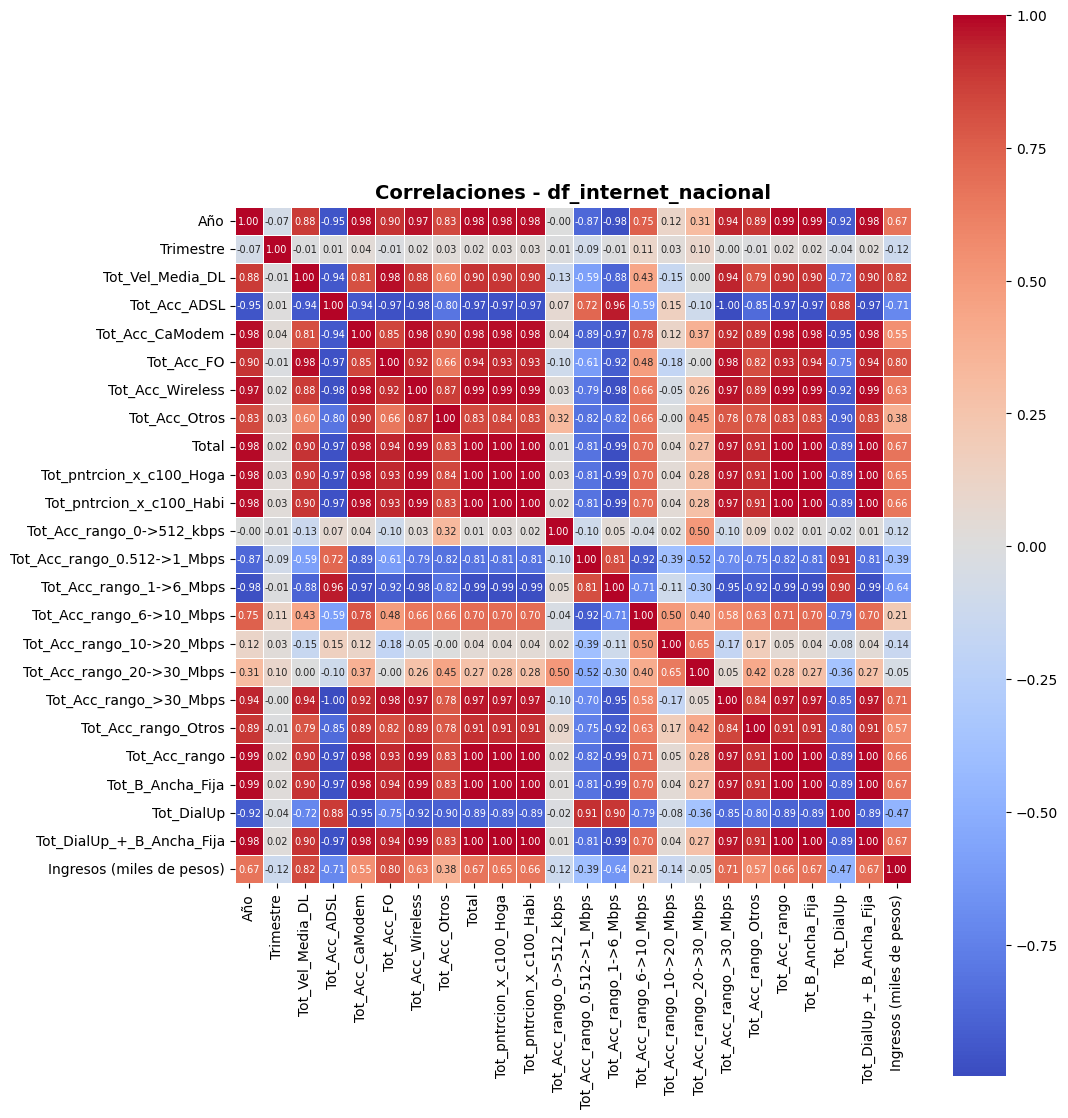

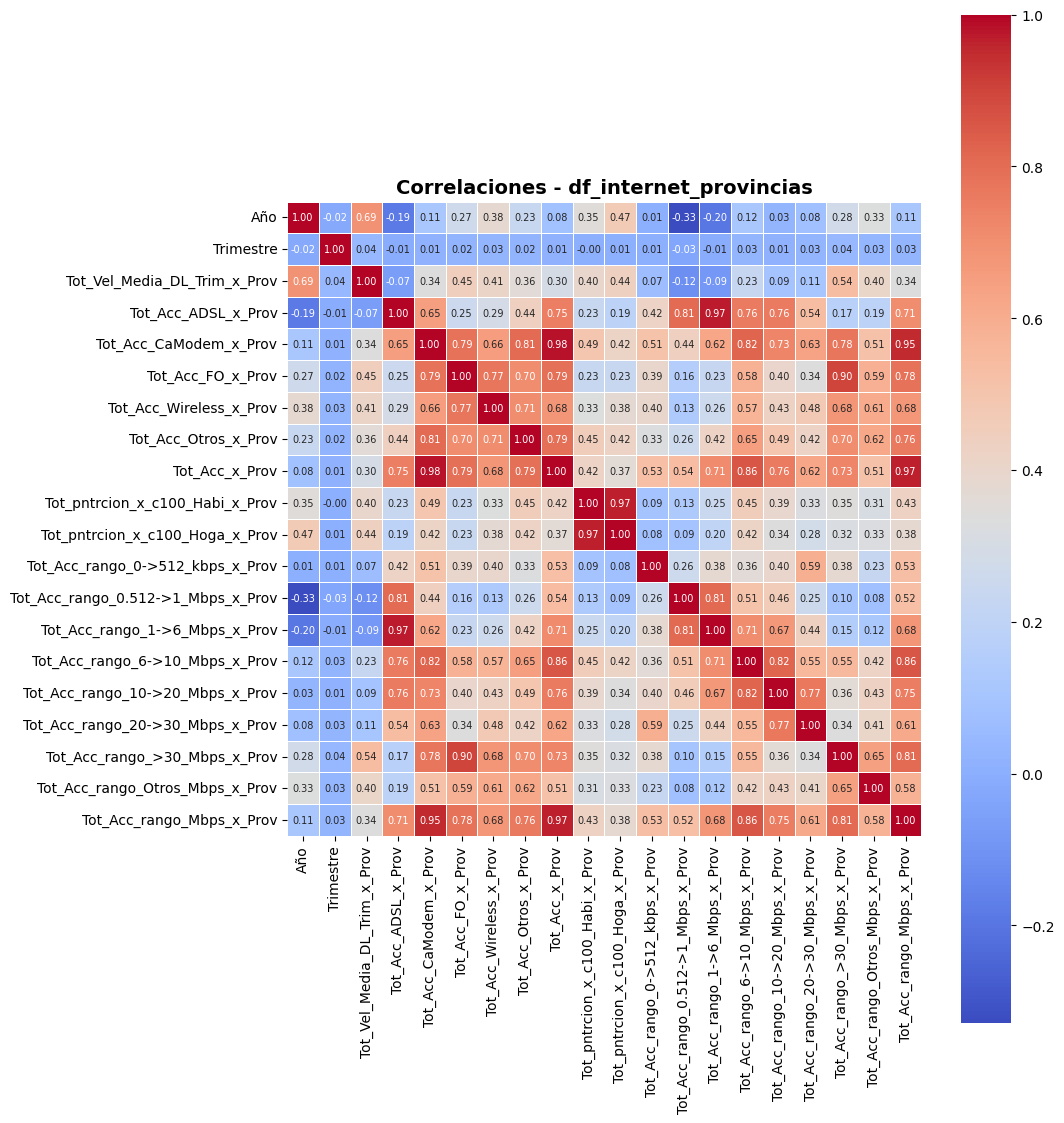

In [98]:
# Calculamos las correlaciones de los datasets df_internet_nacional y df_internet_provincias:
# Para df_internet_nacional
corr_nacional = calcular_correlaciones(df_internet_nacional, metodo="pearson")
plot_correlacion_heatmap(corr_nacional, titulo="Correlaciones - df_internet_nacional")

# Para df_internet_provincias
corr_prov = calcular_correlaciones(df_internet_provincias, metodo="pearson")
plot_correlacion_heatmap(corr_prov, titulo="Correlaciones - df_internet_provincias")

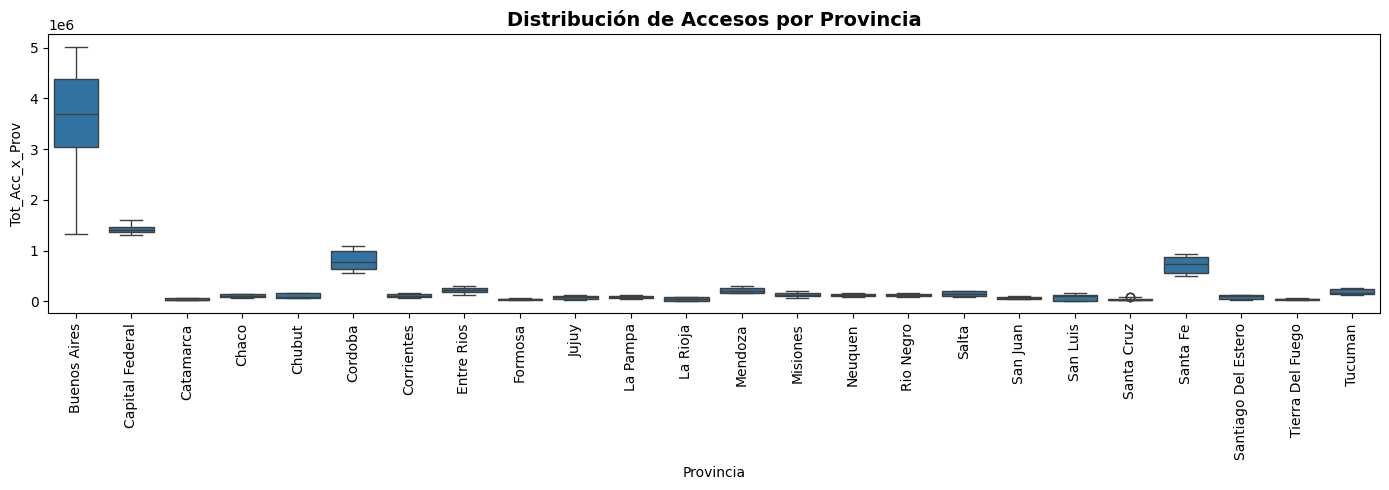

In [ ]:
# 
boxplot_categ_num(df_internet_provincias, cat_col="Provincia", num_col="Tot_Acc_x_Prov", titulo="Distribución de Accesos por Provincia")

2. Análisis Multivariado



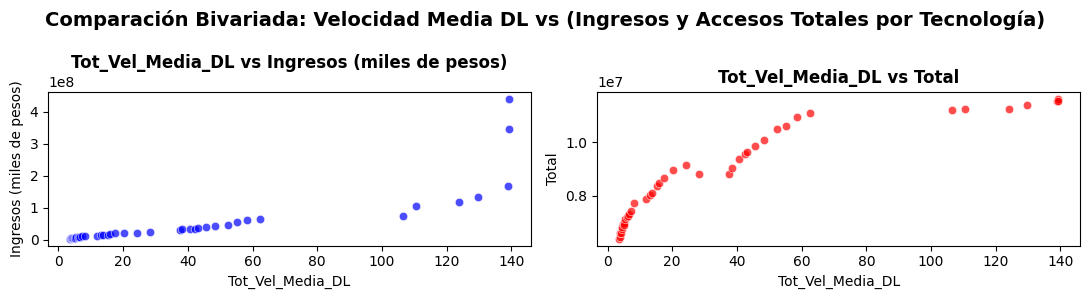

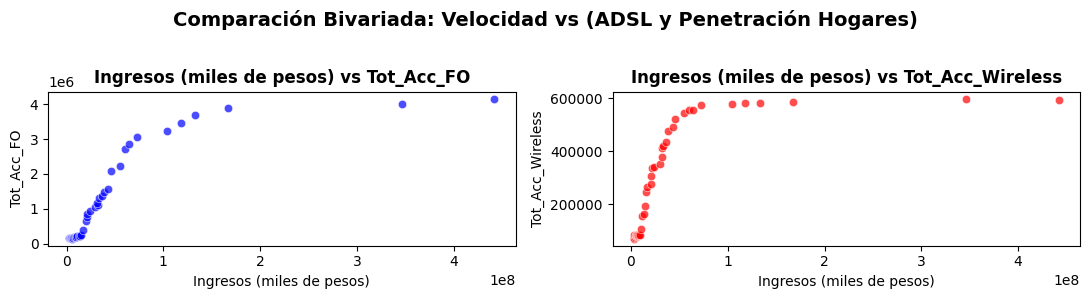

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

def doble_grafico_bivariado(df,x1,y1,x2,y2,titulo="Bivariado: Comparaciones en 2 Subplots"):
    """
    Realiza dos comparaciones bivariadas (scatterplot) en una sola fila, con 2 subplots:
    
    - Subplot 1: df[x1] vs. df[y1]
    - Subplot 2: df[x2] vs. df[y2]

    Parámetros:
    -----------
    df    : pd.DataFrame
        DataFrame con las columnas a analizar.
    x1, y1: str
        Nombres de las columnas para el 1er scatterplot.
    x2, y2: str
        Nombres de las columnas para el 2do scatterplot.
    titulo: str
        Título global de la figura.
    """
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))
    fig.suptitle(titulo, fontweight='bold', fontsize=14)

    # ----- Subplot 1 -----
    sns.scatterplot(
        data=df,
        x=x1,
        y=y1,
        alpha=0.7,
        color="blue",
        ax=ax1
    )
    ax1.set_title(f"{x1} vs {y1}", fontweight='bold')
    ax1.set_xlabel(x1)
    ax1.set_ylabel(y1)

    # ----- Subplot 2 -----
    sns.scatterplot(
        data=df,
        x=x2,
        y=y2,
        alpha=0.7,
        color="red",
        ax=ax2
    )
    ax2.set_title(f"{x2} vs {y2}", fontweight='bold')
    ax2.set_xlabel(x2)
    ax2.set_ylabel(y2)

    plt.tight_layout()
    plt.show()

# ------------------- EJEMPLO DE USO ------------------- #
"""
Supongamos que en tu DataFrame 'df_internet_nacional' existen las columnas:
  - 'Tot_Vel_Media_DL' (velocidad media nacional)
  - 'Tot_Acc_ADSL' (accesos ADSL totales)
  - 'Tot_pntrcion_x_c100_Hoga' (penetración de internet x cada 100 hogares)
  
Queremos ver, en 2 subplots:
  - Subplot1: Velocidad vs. Accesos ADSL
  - Subplot2: Velocidad vs. Penetración Hogares
"""

# Comparamos graficamente la velocidad media de descarga (Tot_Vel_Media_DL) vs. el total de ingresos
# (Tot_Ingresos) y vs. los accesos totales por Tecnoogía a internet "Total": 
doble_grafico_bivariado(df=df_internet_nacional,
                        x1="Tot_Vel_Media_DL", y1="Ingresos (miles de pesos)",
                        x2="Tot_Vel_Media_DL", y2="Total",
                        titulo="Comparación Bivariada: Velocidad Media DL vs (Ingresos y Accesos Totales por Tecnología)")

# Comparamos graficamente los ingresos Totales (Ingresos (miles de pesos)) vs. el accesos total por tecnolgía
# tipo Fibra optica y tipo Wirellss (Tot_Acc_FO y Tot_Acc_Wireless) en el df_internet_nacional:
# (Tot_Ingresos) y vs. la penetración de internet por cada 100 hogares (Tot_pntrcion_x_c100_Hoga).
doble_grafico_bivariado(
                        df=df_internet_nacional,
                        x1="Ingresos (miles de pesos)", y1="Tot_Acc_FO",
                        x2="Ingresos (miles de pesos)", y2="Tot_Acc_Wireless",
                        titulo="Comparación Bivariada: Velocidad vs (ADSL y Penetración Hogares)")

############################################################################################################


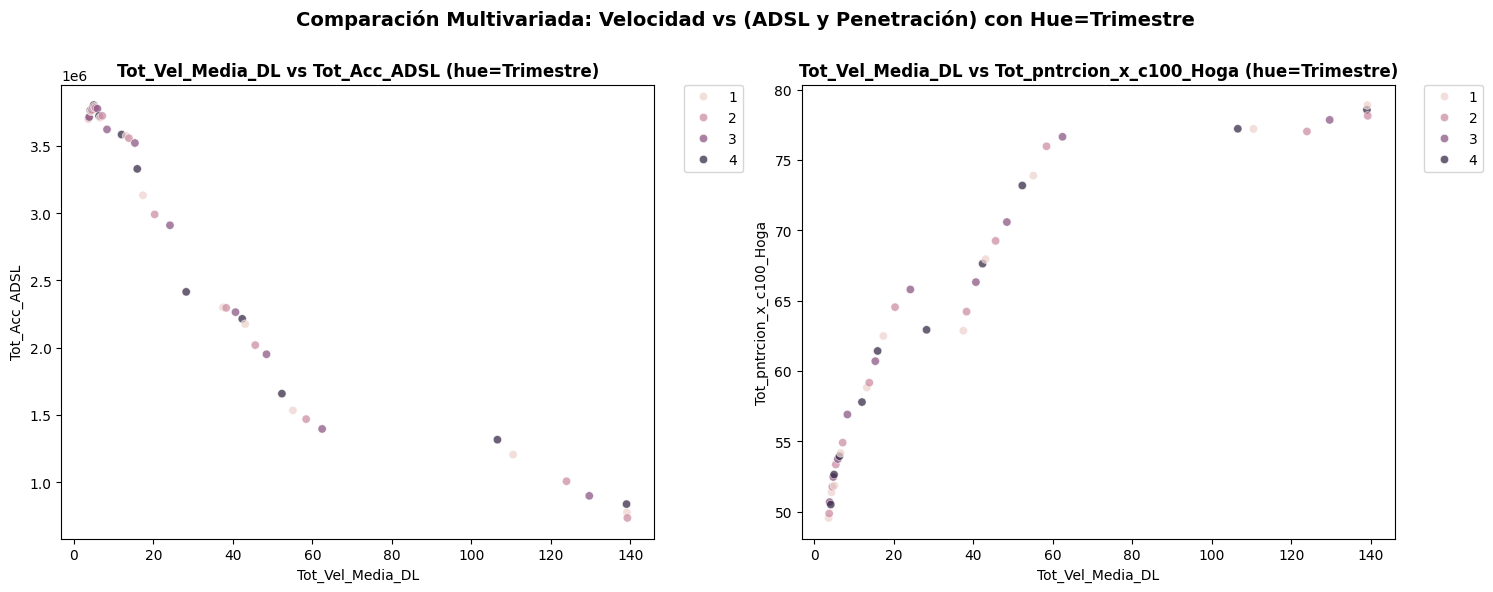

In [ ]:
multivariado_dos_en_una_fila(
     df=df_internet_nacional,
     x1="Tot_Vel_Media_DL", y1="Tot_Acc_ADSL", hue1="Trimestre",
     x2="Tot_Vel_Media_DL", y2="Tot_pntrcion_x_c100_Hoga", hue2="Trimestre",
     titulo="Comparación Multivariada: Velocidad vs (ADSL y Penetración) con Hue=Trimestre")



6. [Visualizaciones Clave y Discusión](#6-visualizaciones-clave-y-discusión)
   - [Gráficos de Tendencia](#gráficos-de-tendencia)
   - [Mapas (si aplica)](#mapas-si-aplica)
   - [Hallazgos Destacados](#hallazgos-destacados)

7. [Conclusiones del EDA](#7-conclusiones-del-eda)
   - [Resumen de Insights](#resumen-de-insights)
   - [Posibles Líneas de Acción](#posibles-líneas-de-acción)


1.2 Importación de librerías, Cargga de Archivos post ETL y Configuraciones iniciales

- Iniciamos el proceso con la importación de los archivos procesados y almacenados en formato parquet resultantes del ETL**

Revisiones previas a los dataframe:
- Dimensiones y tipos de datos: Se ha validado las dimensiones de cada dataframe y los tipos de datos allí contenidos.
        •   Los dataframe del proyecto tienen dataframes que van desde las 43 hsta las 18884 filas y de las 5 a las 25 columnas
        •   Los dos dataframe mas grandes, con dimensiones de 43x25 y 1032x21, tienen campos con 1 nulo y de 24 a 32 nulos respectivamete, su impacto es inferior al 1% en el primer caso por lo cual no se le realiza imputación alguna, en el caso del segunda dataframe donde el impacto llegaría maximo al  3,1% de su cantidad de datos por campo entonces se le realiza imputacion a su media aritmetica ya que obedece a campos realacionados con accesos y velocidades de internet.
        •	La revision de los tipos de valores de cada campo ya se habia realizado en el ETL sin embargo se corrobora Revisar los tipos de datos (numéricos, categóricos, fechas, booleanos, etc.) para confirmar que estén alineados con lo esperado tras el ETL.

### **Tabla de Contenidos**


1. [Introducción]

En este apartado se describe el contexto y el objetivo principal del análisis.
	•	Contexto: La industria de las telecomunicaciones en Argentina se encuentra en un constante crecimiento, con una adopción masiva de servicios de internet, telefonía móvil y otros medios de comunicación. Para el 2020, Argentina alcanzó alrededor de 62,12 millones de conexiones, ubicándose a la vanguardia a nivel regional.
	•	Rol y Objetivo: Asumiendo el papel de Data Analyst para una empresa prestadora de servicios de telecomunicaciones, el objetivo es realizar un Análisis Exploratorio de Datos (EDA) y un dashboard que refleje el comportamiento del sector a nivel nacional y provincial. Este trabajo busca identificar oportunidades de mejora, planificar inversiones y optimizar la calidad de los servicios, con especial atención al acceso a internet y su penetración en hogares y habitantes.

En este sentido, se presentará un EDA detallado y un panel de visualizaciones (dashboard) que apoyen la toma de decisiones y permitan la evaluación de KPIs propuestos.

2. Importación de Librerías y Configuraciones

En esta sección se incluyen:
	•	Librerías Principales: Se describen las librerías de Python necesarias para el análisis (por ejemplo, pandas, numpy, matplotlib, seaborn).
	•	Configuraciones Iniciales: Ajustes de estilo, parámetros para visualizaciones (tamaños de figuras, colores, estilos), supresión de warnings, etc.
	•	Justificación: Se explica por qué se usan dichas librerías (por ejemplo, pandas para manipulación de datos, seaborn y matplotlib para gráficas, etc.).

Esta sección es esencial para asegurar la reproducibilidad y la coherencia del notebook.

3. Carga y Descripción de los Datos

En este punto se detalla:
	•	Lectura de los Archivos: Cómo se cargan los datasets de telecomunicaciones (nacional y provincial) en el entorno de Python.
	•	Descripción de las Columnas: Explicación breve de cada columna (por ejemplo, Fecha, Año, Trimestre, Tot_Acc_ADSL, Tot_Acc_CaModem, etc.).
	•	Dimensión y Estructura: Se muestra la forma de los dataframes (número de filas y columnas) y se presenta una vista rápida (head, tail).
	•	Tipología de las Variables: Identificación de variables categóricas (ej.: Provincia, Periodo) y numéricas (ej.: Total, Ingresos (miles de pesos), etc.).
	•	Contextualización: Se relacionan los datos con la problemática: la penetración de internet, la evolución de los accesos y la relevancia para la empresa de telecomunicaciones.

4. Limpieza y Preparación de Datos

Esta sección se enfoca en la calidad de los datos y en su transformación:
	1.	Detección y Tratamiento de Duplicados: Búsqueda de registros repetidos y decisión sobre su eliminación o consolidación.
	2.	Valores Faltantes (Missing Values): Identificación de celdas vacías y método de imputación (o eliminación) según el tipo de variable y el impacto en el análisis.
	3.	Conversión de Tipos (Casting): Asegurar que cada columna tenga el tipo de dato correcto (ej.: datetime para Fecha, category para Provincia).
	4.	Tratamiento de Outliers: Localización de valores atípicos en variables numéricas (por ejemplo, Ingresos, Total de Accesos) y decisión sobre su manejo (winsorización, eliminación, análisis separado, etc.).
	5.	Creación de Nuevos Campos: Generación de columnas derivadas, como Tasa de Crecimiento o ARPU, que serán de utilidad en el dashboard y en el análisis.

5. Análisis Exploratorio (EDA)

Aquí se presentan los hallazgos principales del EDA. Se sugiere estructurarlo en:
	•	5.1 Análisis Univariado:
	•	Variables Cualitativas: Distribución de la variable Provincia, análisis de Trimestre, etc.
	•	Variables Cuantitativas: Histogramas o boxplots de campos como Tot_Acc_ADSL, Ingresos (miles de pesos), Penetración x100 Hogares/Habitantes, etc.
	•	5.2 Análisis Bivariado y Multivariado:
	•	Correlaciones: Matriz de correlación para variables numéricas y discusiones sobre su interpretación.
	•	Relaciones Categóricas: Gráficos de barras apiladas o grouped bars para ver el comportamiento por Provincia y/o Trimestre.
	•	Tendencias Temporales: Evolución de accesos e ingresos a lo largo del tiempo (líneas de tendencia).

Cada gráfico se acompaña de comentarios y conclusiones que destaquen hallazgos relevantes.

6. Visualizaciones Clave y Discusión

En esta sección se muestran las gráficas más importantes y se discute su relevancia:
	•	Gráficos de Tendencia Nacional: Penetración de internet a lo largo del tiempo, comparaciones entre tecnologías (ADSL, CableModem, FO, etc.).
	•	Gráficos por Provincia: Uso de mapas o barras que reflejen diferencias regionales.
	•	KPIs e Indicadores: Visualización de métricas como la Tasa de Crecimiento, el ARPU y la penetración x100 Hogares/Habitantes, entre otras.
	•	Discusión: Se exponen insights clave sobre la adopción de diferentes tecnologías, los focos de mayor crecimiento y la relevancia para la empresa.

7. Conclusiones del EDA

Finalmente, se sintetizan las observaciones más relevantes:
	•	Hallazgos Principales:
	•	Tendencias de crecimiento o estancamiento en accesos e ingresos.
	•	Provincias con mayor y menor penetración.
	•	Tecnología predominante y oportunidades de expansión.
	•	Limitaciones del Análisis:
	•	Datos faltantes, supuestos realizados y posibles sesgos.
	•	Recomendaciones:
	•	Sugerencias de inversión en zonas con mayor potencial de crecimiento.
	•	Ajustes de la estrategia comercial en provincias con penetración más baja.
	•	Énfasis en la calidad del servicio para sostener y aumentar el ARPU.
	•	Próximos Pasos:
	•	Profundizar en modelos predictivos para ingresos y accesos futuros.
	•	Incorporar fuentes de datos externas (demográficas, económicas) para enriquecer el análisis.

Estas conclusiones preparan el terreno para la presentación de un dashboard que ilustre los KPIs y facilite la toma de decisiones de los stakeholders de la empresa de telecomunicaciones.

	Nota: Ajusta la redacción y la extensión de cada apartado según la profundidad de tu proyecto y los lineamientos específicos de la rúbrica.

- Validamos el dataframe "df_internet_nacional"  

In [6]:
'''
El dataframe df_internet_provincias tiene una dimensión de: (1032, 21) 
                                    Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos
Año                                    int64     1032  0        0  0    0        0   NaN    0    1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0     
Trimestre                              int64     1032  0        0  0    0        0   NaN    0    1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874          1         1        1.0        2.0        4.0           4    0     
Provincia                           category        0  0        0  0    0     1032  1032    0    1032       24   NaN     0                   NaN         NaN            NaN            NaN        NaN       NaN        NaN        NaN        NaN         NaN  NaN     
Tot_Vel_Media_DL_Trim_x_Prov         float64        0  0     1008  0    0        0   NaN   24    1008     1003     0   NaN              2.637143    8.748819      24.720245      33.660764   3.476761  2.573729   4.866698  10.089315  29.875292      234.44    0     
Tot_Acc_ADSL_x_Prov                  float64        0  0     1007  0    0        0   NaN   25    1007      897     0   NaN              4.661572   23.906101  112930.860973  236292.179471    11432.0    2230.0    19789.5    43967.0    87220.0   1586343.0    0     
Tot_Acc_CaModem_x_Prov               float64        0  0     1007  0    0        0   NaN   25    1007      890    14   NaN              3.869341   16.019831  182158.281033  446005.777989    34984.0       0.0    11020.5    40750.0    76783.5   2797700.0    0     
Tot_Acc_FO_x_Prov                    float64        0  0     1007  0    0        0   NaN   25    1007      754     9   NaN              7.075133   56.751358   48556.986097   175869.37569       19.0       0.0      354.0     3015.0    29257.0   1849476.0    0     
Tot_Acc_Wireless_x_Prov              float64        0  0     1007  0    0        0   NaN   25    1007      716    38   NaN              3.262511   12.686098   12542.229394   20909.412762        0.0       0.0      813.0     5224.0    14367.5    138638.0    0     
Tot_Acc_Otros_x_Prov                 float64        0  0     1007  0    0        0   NaN   25    1007      672     0   NaN              3.106073   11.805812    6497.041708   11239.855091       34.0       2.0      334.5     1920.0     7548.0     73415.0    0     
Tot_Acc_x_Prov                       float64        0  0     1007  0    0        0   NaN   25    1007      999     0   NaN              3.883395   15.918066  362685.399206  777313.747461    13307.0   12557.0    62411.5   113915.0   195652.0   5011620.0    0     
Tot_pntrcion_x_c100_Habi_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      991     0   NaN              1.510943    2.859164      15.727248       9.240063      15.12     2.723   9.018188  13.674812  20.323973   52.236739    0     
Tot_pntrcion_x_c100_Hoga_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      994     0   NaN              0.702706    0.208253      52.794973      24.135063  32.491996   9.51397  33.957657  50.133004  67.010861  124.061394    0     
Tot_Acc_rango_0->512_kbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      387     0   NaN             13.835871  218.415976       1953.317   12676.575806       18.0       6.0      43.25      107.0     466.25    238920.0    0     
Tot_Acc_rango_0.512->1_Mbps_x_Prov   float64        0  0     1000  0    0        0   NaN   32    1000      764    50   NaN              4.155821   19.680779       8864.257   20312.520997        0.0       0.0     389.75     2061.0     6851.5   171244.48    0     
Tot_Acc_rango_1->6_Mbps_x_Prov       float64        0  0     1000  0    0        0   NaN   32    1000      991     0   NaN              4.881266   25.635111     132772.534  322256.911138    14014.0    1124.0    23812.5    42132.5   83710.25  2299705.32    0     
Tot_Acc_rango_6->10_Mbps_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      917    36   NaN              2.757707    7.978694       38408.51   64156.365883        0.0       0.0    3876.75    13932.0    42593.5    403575.0    0     
Tot_Acc_rango_10->20_Mbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      891    69   NaN              4.956438   30.424872      37138.329   88290.744464        0.0       0.0    2706.75    10503.0   26463.75    886678.0    0     
Tot_Acc_rango_20->30_Mbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      741    98   NaN              7.631491   75.327419       20091.33   69299.281156        0.0       0.0      43.75     1658.0   10109.25    949093.0    0     
Tot_Acc_rango_>30_Mbps_x_Prov        float64        0  0     1000  0    0        0   NaN   32    1000      717   106   NaN              6.213321   42.753053     122209.765  465749.959124        0.0       0.0       15.0     4253.5   43399.25   4068292.0    0     
Tot_Acc_rango_Otros_Mbps_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      459   459   NaN              5.021002   30.379387      6514.3833   15296.658446        0.0       0.0        0.0      373.5    6800.75    125547.0    0     
Tot_Acc_rango_Mbps_x_Prov            float64        0  0     1000  0    0        0   NaN   32    1000      995     0   NaN              3.880622   15.869643     367909.447  789934.841211    14029.0   12406.0   62342.25   113620.5  196919.75   5044557.0    0      
    Año   Trimestre Provincia         Tot_Vel_Media_DL_Trim_x_Prov  Tot_Acc_ADSL_x_Prov  Tot_Acc_CaModem_x_Prov  Tot_Acc_FO_x_Prov  Tot_Acc_Wireless_x_Prov  Tot_Acc_Otros_x_Prov  Tot_Acc_x_Prov  Tot_pntrcion_x_c100_Habi_x_Prov  Tot_pntrcion_x_c100_Hoga_x_Prov  Tot_Acc_rango_0->512_kbps_x_Prov  Tot_Acc_rango_0.512->1_Mbps_x_Prov  Tot_Acc_rango_1->6_Mbps_x_Prov  Tot_Acc_rango_6->10_Mbps_x_Prov  Tot_Acc_rango_10->20_Mbps_x_Prov  Tot_Acc_rango_20->30_Mbps_x_Prov  Tot_Acc_rango_>30_Mbps_x_Prov  Tot_Acc_rango_Otros_Mbps_x_Prov  Tot_Acc_rango_Mbps_x_Prov
0  2014  1             Buenos Aires  3.733133                      1567685.0            1000879.0               120960.0           16528.0                  33824.0               2739876.0       16.692346                         54.570073                       8469.0                            171244.48                           2279875.0                       121787.12                        38923.32                          206.16                            4037.0                         0.0                              2624542.08               
1  2014  1          Capital Federal  4.024082                       445569.0             820161.0                17767.0            1866.0                  14555.0               1299918.0       42.655072                        112.254123                        852.0                             88825.52                           1096050.0                        70292.88                        38797.68                           54.84                            6208.0                         0.0                              1301080.92               
2  2014  1                Catamarca  2.802734                        24126.0                 46.0                   17.0               0.0                     43.0                 24232.0        6.184615                         24.251751                         19.0                              9147.00                             13330.0                         1672.00                           64.00                            0.00                               0.0                         0.0                                24232.00               
3  2014  1                    Chaco  3.255837                        52971.0               9497.0                   30.0               0.0                     58.0                 62556.0        5.553671                         20.718539                        438.0                             15849.00                             40869.0                         4644.00                          741.00                            5.00                               0.0                         0.0                                62546.00                
       Año   Trimestre Provincia             Tot_Vel_Media_DL_Trim_x_Prov  Tot_Acc_ADSL_x_Prov  Tot_Acc_CaModem_x_Prov  Tot_Acc_FO_x_Prov  Tot_Acc_Wireless_x_Prov  Tot_Acc_Otros_x_Prov  Tot_Acc_x_Prov  Tot_pntrcion_x_c100_Habi_x_Prov  Tot_pntrcion_x_c100_Hoga_x_Prov  Tot_Acc_rango_0->512_kbps_x_Prov  Tot_Acc_rango_0.512->1_Mbps_x_Prov  Tot_Acc_rango_1->6_Mbps_x_Prov  Tot_Acc_rango_6->10_Mbps_x_Prov  Tot_Acc_rango_10->20_Mbps_x_Prov  Tot_Acc_rango_20->30_Mbps_x_Prov  Tot_Acc_rango_>30_Mbps_x_Prov  Tot_Acc_rango_Otros_Mbps_x_Prov  Tot_Acc_rango_Mbps_x_Prov
1028  2024  4                     Santa Fe NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                               468.0                             6845.0                              82343.0                         164019.0                         59636.0                           22135.0                           557629.0                       16426.0                          909501.0                 
1029  2024  4          Santiago Del Estero NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                               180.0                             1173.0                              13018.0                          53980.0                         24514.0                            5794.0                            23641.0                         930.0                          123230.0                 
1030  2024  4             Tierra Del Fuego NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                                22.0                              834.0                              10283.0                          12618.0                         19536.0                            6085.0                             4342.0                        7879.0                           61599.0                 
1031  2024  4                      Tucuman NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                                39.0                             1089.0                              18850.0                          22817.0                         24476.0                            1583.0                           196919.0                         562.0                          266335.0
'''

'\nEl dataframe df_internet_provincias tiene una dimensión de: (1032, 21) \n                                    Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos\nAño                                    int64     1032  0        0  0    0        0   NaN    0    1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0     \nTrimestre                              int64     1032  0        0  0    0        0   NaN    0    1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874          1         1        1.0        2.0        4.0           4    0     \nProvincia                           category        0  0        0  0    0     1032  1032    0    1032       24   NaN     0         

                                   Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda           Mínimo    Q1_25%     Q2_50%     Q3_75%       Máximo      Negativos
Año                                    int64     1032  0        0  0    0        0   NaN   0     1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596           2014      2014     2016.0     2019.0       2022.0        2024    0     
Trimestre                              int64     1032  0        0  0    0        0   NaN   0     1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874              1         1        1.0        2.0          4.0           4    0     
Provincia                           category        0  0        0  0    0     1032  1032   0     1032       24   NaN     0                   NaN         NaN            NaN            NaN       

Tras la depuración de los datos proseguimos con la revisión en detalle del cotenido a nivel de datos y lo que representan para el analisis:

1. Revisión y limpieza de valores atípicos:
	-	Se identifican valores negativos en 4 datos del campo "Accesos" los cuales se imputan a valores positivos asumiendo pudo ser un error de digitación o carga, y considerando no se darian accesos negativos ya que eso obedeceria es a otro tipo de indicador asociado a bajas o shurn.

In [34]:
import time
# Imputamos los valores negativos en el campos "Accesos" del dataframe "df_internet_Acc_vel_loc_sinrangos" los cuales seran reemplazados por su valor absoluto:
valores_negativos = df_internet_Acc_vel_loc_sinrangos["Accesos"][df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0]
print("Valores negativos en 'Accesos':")
print(valores_negativos)
df_internet_Acc_vel_loc_sinrangos.loc[df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0, "Accesos"] = df_internet_Acc_vel_loc_sinrangos["Accesos"].abs() # Reemplazamos por su valor absoluto.

NameError: name 'df_internet_Acc_vel_loc_sinrangos' is not defined

1. **Análisis de Series Temporales:**
	- Se crea un campo Fecha ordenado de forma ascendente para poder graficar a lo largo del tiempo las diferentes variables a explorar, esto lo hacemos co los campos Año y trimestre generando una fecha equivalente con el primer dia de cada mes de cada trimestre y se valida quede tipo datetime.
   	- Graficamos la evolución de variables clave como:
		- Accesos a Internet lo largo del tiempo Vs. Tecnologias de Acceso y Rangos de Velocidades de Acceso a Internet.
		- Penetración a lo largo del tiempo Vs. Tecnologias de Acceso y Rangos de Velocidades de Acceso a Internet.
		- Ingresos a lo largo del tiempo Vs. Tecnologias de Acceso y Rangos de Velocidades de Acceso a Internet.

   	- Se identifican tendencias y estacionalidades en el tiempo.

	- Graficamos la evolucion del acceso Total a Internet segun las provinvias donde se ha implementado Fibra optica.
	- Graficamos la evolucion del acceso Total a Internet segun las provinvias donde se logran velocidades superiores a 30Mbps.
	- Graficamos la velocidad media de DL por provincia de forma ascendente para el ultimo trimestre de la data
	- Graficamos como se distribuyen los ingresos por Provincia en el ultimo trimestre de la data

	- Obtener la matriz de correlaciones
	- Obtenemos la matriz de correlaciones

In [ ]:
from functions import *
# Creamos la columna "Fecha" en el DataFrame "df_internet_nacional" para su uso en los graficos de series temporales:
df_internet_nacional = crear_fecha_trimestral_df(df_internet_nacional,"Año","Trimestre")

# Creamos la columna "Fecha" en el DataFrame "df_internet_provincias" para su uso en los graficos de series temporales:
df_internet_provincias = crear_fecha_trimestral_df(df_internet_provincias,"Año","Trimestre")


In [60]:
# Creamos columnas complementarias con información calculada a partir de los campos iniciales del DataFrame "df_internet_nacional":
# Creamos la columna "ARPU_x_Tecnología"
df_internet_nacional["ARPU_x_Tecnología"] = df_internet_nacional["Ingresos (miles de pesos)"] / df_internet_nacional["Total"]
# Creamos la columna "ARPU_x_Velocidad"
df_internet_nacional["ARPU_x_Rango_Velo"] = df_internet_nacional["Ingresos (miles de pesos)"] / df_internet_nacional["Tot_Acc_rango"]

# Creamos la la columna Tasa de Crecimiento Trimestral de los Ingresos en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Ingresos"] = ((df_internet_nacional["Ingresos (miles de pesos)"] - df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) / df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) * 100

# Creamos la columna Tasa de Crecimiento de Accesos en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Acce_x_Tecno"] = ((df_internet_nacional["Total"] - df_internet_nacional["Total"].shift(1)) / df_internet_nacional["Total"].shift(1)) * 100

# Calulamos la Tasa de Crecimiento de la penetración de internet en hogares y personas en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Hoga"] - df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(1)) / df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Habi"] - df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(1)) / df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(1)) * 100

# calculamos la tasa de crecimiento Interanual de la penetración de Internet por cada 100 hogares y por cada 100 habitantes en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga_YoY"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Hoga"] - df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(4)) / df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(4)) * 100
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi_YoY"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Habi"] - df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(4)) / df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(4)) * 100

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Tecnologia ("Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros") en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Acc_ADSL"] = ((df_internet_nacional["Tot_Acc_ADSL"] - df_internet_nacional["Tot_Acc_ADSL"].shift(1)) / df_internet_nacional["Tot_Acc_ADSL"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_CaModem"] = ((df_internet_nacional["Tot_Acc_CaModem"] - df_internet_nacional["Tot_Acc_CaModem"].shift(1)) / df_internet_nacional["Tot_Acc_CaModem"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_FO"] = ((df_internet_nacional["Tot_Acc_FO"] - df_internet_nacional["Tot_Acc_FO"].shift(1)) / df_internet_nacional["Tot_Acc_FO"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Wireless"] = ((df_internet_nacional["Tot_Acc_Wireless"] - df_internet_nacional["Tot_Acc_Wireless"].shift(1)) / df_internet_nacional["Tot_Acc_Wireless"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Otros"] = ((df_internet_nacional["Tot_Acc_Otros"] - df_internet_nacional["Tot_Acc_Otros"].shift(1)) / df_internet_nacional["Tot_Acc_Otros"].shift(1)) * 100

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Rango de Velocidad ("Tot_Acc_rango_0_512_kbps","Tot_Acc_rango_0.512->1_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_Otros") en el df_internet_nacional:
df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"] = ((df_internet_nacional["Tot_Acc_rango_0->512_kbps"] - df_internet_nacional["Tot_Acc_rango_0->512_kbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_0->512_kbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"] - df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_1->6_Mbps"] - df_internet_nacional["Tot_Acc_rango_1->6_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_1->6_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_6->10_Mbps"] - df_internet_nacional["Tot_Acc_rango_6->10_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_6->10_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_10->20_Mbps"] - df_internet_nacional["Tot_Acc_rango_10->20_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_10->20_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_20->30_Mbps"] - df_internet_nacional["Tot_Acc_rango_20->30_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_20->30_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_>30_Mbps"] - df_internet_nacional["Tot_Acc_rango_>30_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_>30_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Otros"] = ((df_internet_nacional["Tot_Acc_rango_Otros"] - df_internet_nacional["Tot_Acc_rango_Otros"].shift(1)) / df_internet_nacional["Tot_Acc_rango_Otros"].shift(1)) * 100

# Limpiamos cualquier valor almacenado en los nuevos campos ("Tasa_Crec_Accesos","Tasa_Crec_Pntracion_Hogares","Tasa_Crec_Pntracion_Habitantes","Tasa_Crec_Acc_ADSL","Tasa_Crec_Acc_CaModem","Tasa_Crec_Acc_FO","Tasa_Crec_Acc_Wireless","Tasa_Crec_Acc_Otros","Tasa_Crec_Acc_0_512_kbps","Tasa_Crec_Acc_0.512_1_Mbps","Tasa_Crec_Acc_1_6_Mbps","Tasa_Crec_Acc_6_10_Mbps","Tasa_Crec_Acc_10_20_Mbps","Tasa_Crec_Acc_20_30_Mbps","Tasa_Crec_Acc_>30_Mbps","Tasa_Crec_Pntcion_xc100_Hoga","Tasa_Crec_Pntcion_xc100_Habi") producto de division en cero que pueda generar problema posteriormente y le reemplazamos por cero:
df_internet_nacional["Tasa_Crec_Acce_x_Tecno"] = df_internet_nacional["Tasa_Crec_Acce_x_Tecno"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"] = df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"] = df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_ADSL"] = df_internet_nacional["Tasa_Crec_Acc_ADSL"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_CaModem"] = df_internet_nacional["Tasa_Crec_Acc_CaModem"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_FO"] = df_internet_nacional["Tasa_Crec_Acc_FO"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Wireless"] = df_internet_nacional["Tasa_Crec_Acc_Wireless"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Otros"] = df_internet_nacional["Tasa_Crec_Acc_Otros"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"] = df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Otros"] = df_internet_nacional["Tasa_Crec_Acc_Otros"].replace([np.inf, -np.inf], np.nan).fillna(0)

############################################################################################################################################################################


df_internet_provincias.sort_values(["Provincia", "Fecha"], inplace=True) # Aseguramos orden por Provincia y Fecha
grupo = df_internet_provincias.groupby("Provincia") # Creamos el groupby por Provincia

# Creamos la columna Tasa de Crecimiento de Accesos por Provincia en el df_internet_provincias:, 
# Usamos pct_change dentro de apply, y reseteamos el índice:
df_internet_provincias["Tasa_Crec_Accesos_x_Prov"] = (grupo["Tot_Acc_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True)) 

# Calculamos la Tasa de Crecimiento de la penetración de internet por cada 100 Hogares y por cada 100 Habitantes en el df_internet_provincias
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"] = (grupo["Tot_pntrcion_x_c100_Hoga_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"] = (grupo["Tot_pntrcion_x_c100_Habi_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Función para calcular la tasa de crecimiento Interanual (YOY) donde comparamos el valor actual con el de 4 trimestres atrás:
def yoy_growth(series):
    return (series - series.shift(4)) / series.shift(4) * 100

# Calculamos la tasa de crecimiento Interanual (YOY) de la penetración por cada 100 hogares y por cada 100 Habitantes
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov_YoY"] = (grupo["Tot_pntrcion_x_c100_Hoga_x_Prov"].transform(yoy_growth))
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov_YoY"] = (grupo["Tot_pntrcion_x_c100_Habi_x_Prov"].transform(yoy_growth))


# Creamos las columnas de Tasa de Crecimiento de accesos para cada Tecnologia por Provincia ("Tot_Acc_ADSL_x_Prov","Tot_Acc_CaModem_x_Prov","Tot_Acc_FO_x_Prov","Tot_Acc_Wireless_x_Prov","Tot_Acc_Otros_x_Prov") en el df_internet_provincias:
df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"] = (grupo["Tot_Acc_ADSL_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"] = (grupo["Tot_Acc_CaModem_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"] = (grupo["Tot_Acc_FO_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"] = (grupo["Tot_Acc_Wireless_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"] = (grupo["Tot_Acc_Otros_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Rango de Velocidad por Provincia ("Tot_Acc_rango_0->512_kbps_x_Prov","Tot_Acc_rango_0.512->1_Mbps_x_Prov","Tot_Acc_rango_1->6_Mbps_x_Prov","Tot_Acc_rango_6->10_Mbps_x_Prov","Tot_Acc_rango_10->20_Mbps_x_Prov","Tot_Acc_rango_20->30_Mbps_x_Prov","Tot_Acc_rango_>30_Mbps_x_Prov","Tot_Acc_rango_Otros_Mbps_x_Prov") en el df_internet_provincias:
df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"] = (grupo["Tot_Acc_rango_0->512_kbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_0.512->1_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_1->6_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_6->10_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_10->20_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_20->30_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_>30_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_Otros_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Limpiamos cualquier valor almacenado en los nuevos campos ("Tasa_Crec_Accesos_Prov","Tasa_Crec_Pntracion_Hogares_Prov","Tasa_Crec_Pntracion_Habitantes_Prov","Tasa_Crec_Acc_ADSL_Prov","Tasa_Crec_Acc_CaModem","Tasa_Crec_Acc_FO","Tasa_Crec_Acc_Wireless","Tasa_Crec_Acc_Otros","Tasa_Crec_Acc_0_512_kbps","Tasa_Crec_Acc_0.512_1_Mbps","Tasa_Crec_Acc_1_6_Mbps","Tasa_Crec_Acc_6_10_Mbps","Tasa_Crec_Acc_10_20_Mbps","Tasa_Crec_Acc_20_30_Mbps","Tasa_Crec_Acc_>30_Mbps","Tasa_Crec_Pntcion_xc100_Hoga","Tasa_Crec_Pntcion_xc100_Habi") producto de division en cero que pueda generar problema posteriormente y le reemplazamos por cero:
df_internet_provincias["Tasa_Crec_Accesos_x_Prov"] = df_internet_provincias["Tasa_Crec_Accesos_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"] = df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"] = df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)



############################################################################################################################################################################





/var/folders/78/5lwff5710n349fmq7y5ycwgc0000gn/T/ipykernel_66772/294149660.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df_internet_provincias.groupby("Provincia") # Creamos el groupby por Provincia


In [16]:
print(validar_df(df_internet_nacional))
print(validar_df(df_internet_provincias))

                                 Tipo de Dato    Int Int64 Float Bool DateT Str Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness  Kurtosis   Media            Desviación_Std   Moda           Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos
Fecha                             datetime64[ns]   0  0      0    0    42     0  NaN    0     42       42     NaN   NaN                  NaN        NaN              NaN              NaN            NaN            NaN             NaN              NaN              NaN           NaN  NaN     
Año                                        int64  42  0      0    0     0     0  NaN    0     42       11       0   NaN             0.024172  -1.186795      2018.761905         3.074756           2014           2014          2016.0           2019.0           2021.0          2024    0     
Trimestre                                  int64  42  0      0    0     0     0  NaN    0     42        4       0   NaN           

In [17]:
# Guardamos los dataframe con los campos adicionales asociados a fecha y otros calculos para alimentar el PowerBI
df_internet_nacional.to_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/df_internet_nacional.parquet')
df_internet_provincias.to_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/df_internet_provincias.parquet')
df_internet_nacional.to_csv('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/df_internet_nacional.csv')
df_internet_provincias.to_csv('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/df_internet_provincias.csv')


KeyError: 'Tot_Acc_rango_0_512_kbps'

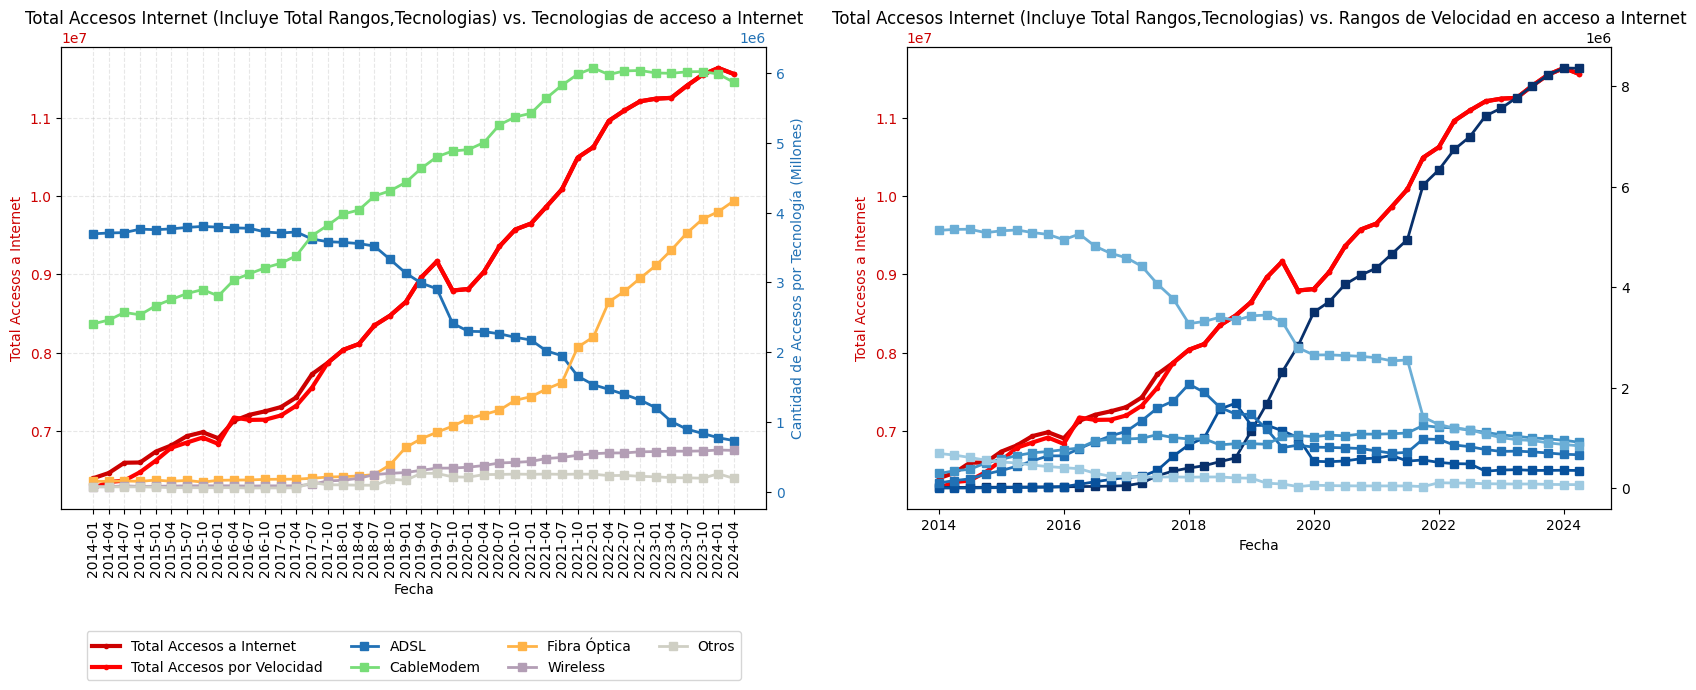

In [18]:
# 

# Crear matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Total","Tot_Acc_rango"],
    labels_izq=["Total Accesos a Internet","Total Accesos por Velocidad"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Total Accesos a Internet",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Accesos Internet (Incluye Total Rangos,Tecnologias) vs. Tecnologias de acceso a Internet",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90,       # Rotación de las etiquetas del eje X
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#2171B5","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# SUBPLOT 2: Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Total","Tot_Acc_rango"],
    labels_izq=["Total Accesos a Internet total tecnologías","Total Accesos total rangos de Velocidad"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0_512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0-512 kbps","Otros Rangos"],
    label_eje_izq="Total Accesos a Internet",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Accesos Internet (Incluye Total Rangos,Tecnologias) vs. Rangos de Velocidad en acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

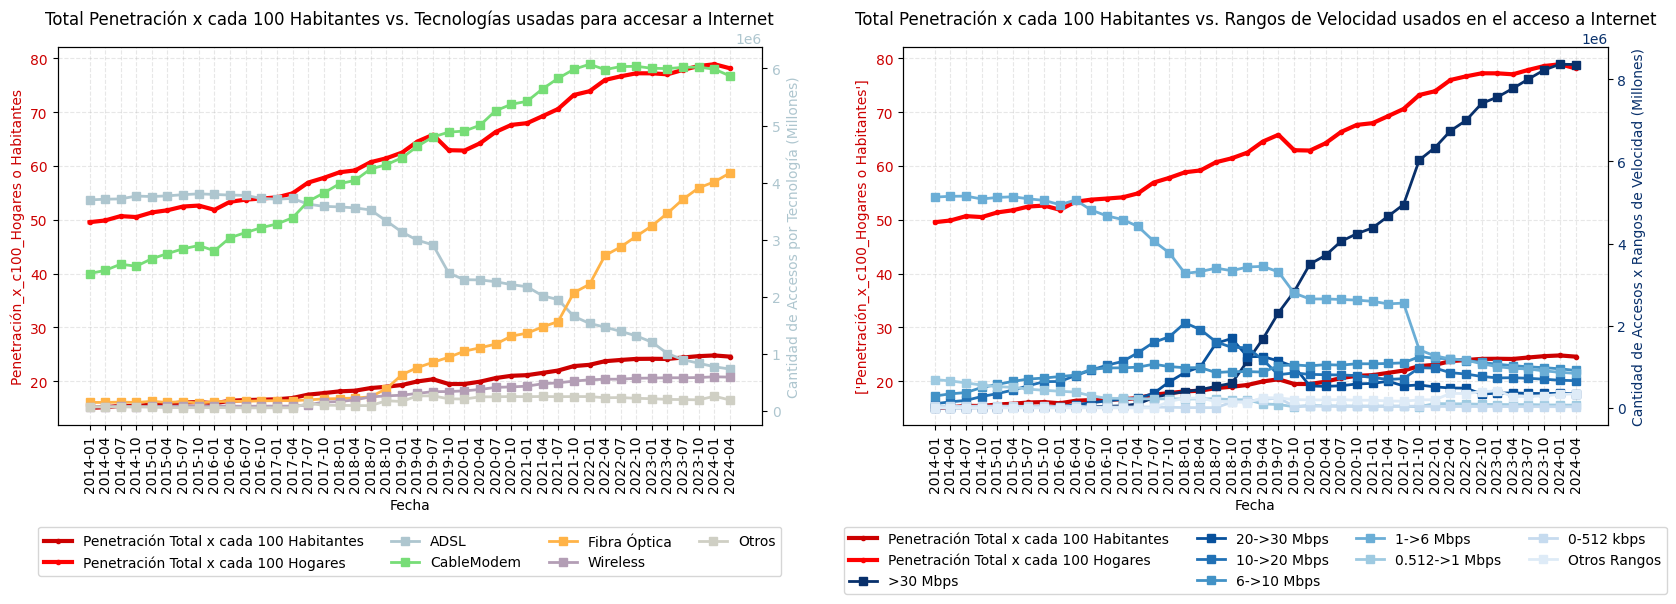

In [ ]:
# 

# Crear matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Tot_pntrcion_x_c100_Habi","Tot_pntrcion_x_c100_Hoga"],
    labels_izq=["Penetración Total x cada 100 Habitantes","Penetración Total x cada 100 Hogares"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Penetración_x_c100_Hogares o Habitantes",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Penetración x cada 100 Habitantes vs. Tecnologías usadas para accesar a Internet",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90,       # Rotación de las etiquetas del eje X
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#AEC6CF","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# SUBPLOT 2: Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Tot_pntrcion_x_c100_Habi","Tot_pntrcion_x_c100_Hoga"],
    labels_izq=["Penetración Total x cada 100 Habitantes","Penetración Total x cada 100 Hogares"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0_512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0-512 kbps","Otros Rangos"],
    label_eje_izq=["Penetración_x_c100_Hogares o Habitantes"],      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Penetración x cada 100 Habitantes vs. Rangos de Velocidad usados en el acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

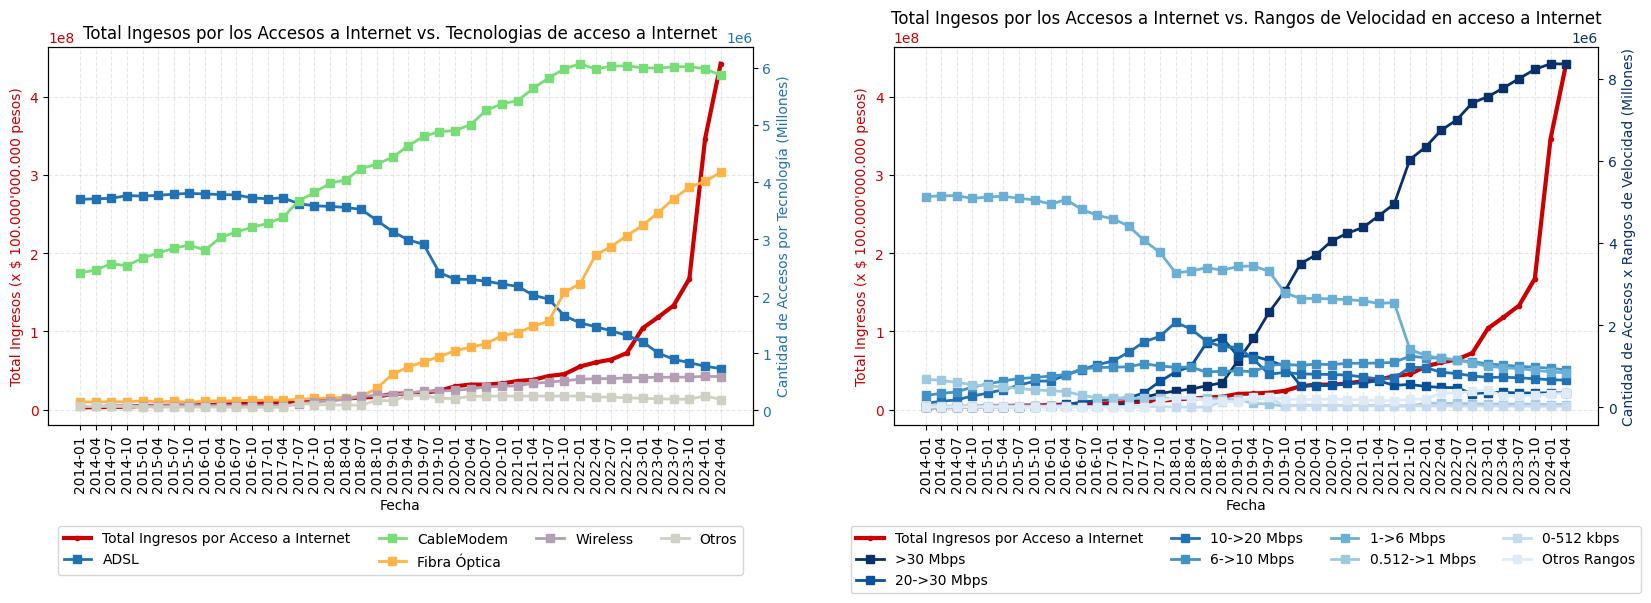

In [ ]:
# Graficos asociados a Ingresos Totales en el tiempo

# Crear matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Ingresos (miles de pesos)"],
    labels_izq=["Total Ingresos por Acceso a Internet"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Total Ingresos (x $ 100.000'000.000 pesos)",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Ingesos por los Accesos a Internet vs. Tecnologias de acceso a Internet",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90,       # Rotación de las etiquetas del eje X
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#2171B5","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# SUBPLOT 2: Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Ingresos (miles de pesos)"],
    labels_izq=["Total Ingresos por Acceso a Internet"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0_512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0-512 kbps","Otros Rangos"],
    label_eje_izq="Total Ingresos (x $ 100.000'000.000 pesos)",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Ingesos por los Accesos a Internet vs. Rangos de Velocidad en acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).


3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.



4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

-   Validamos sesgos en las variables numericas continuas con la tecnica de la medida estadística "skewness", que indica la asimetría de la distribución de los datos en un campo, para ello tenemos en cuenta:
    - *Skewness cercano a 0: La distribución es aproximadamente simétrica.*
    - *Skewness positivo: La distribución tiene una cola extendida hacia la derecha (más valores extremos altos).*
	- *Skewness negativo: La distribución tiene una cola extendida hacia la izquierda (más valores extremos bajos).*

In [ ]:
'''
- Para el dataframe "df_internet_nacional" con los resulados obtenidos se identifica sesgo a la derecha para los campos:
    - Tot_Vel_Media_DL: skewness = 1.33, Tot_Acc_rango_0_512_kbps: skewness = 2.92, Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08, Tot_Acc_rango_20->30_Mbps: skewness = 1.11, Ingresos (miles de pesos): skewness = 3.38, porque sus valores skewness son positivos y superiores a 1.
- Con los resulados obtenidos se identifica sesgo a la izquierda para los campos:
    - Tot_Acc_rango_6->10_Mbps: skewness = -1.29, porque su valore skewness es negativo e inferios a -1
- Para el campo con el sesgo positivo mas marcado que corresponde a "Ingresos (miles de pesos)": skewness = 3.38 hacemos una transformación bajo las técnicas de Raiz Cuadrada y Logaritmica, luego comparamos visualmente su efecto:
'''

'\n- Para el dataframe "df_internet_nacional" con los resulados obtenidos se identifica sesgo a la derecha para los campos:\n    - Tot_Vel_Media_DL: skewness = 1.33, Tot_Acc_rango_0_512_kbps: skewness = 2.92, Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08, Tot_Acc_rango_20->30_Mbps: skewness = 1.11, Ingresos (miles de pesos): skewness = 3.38, porque sus valores skewness son positivos y superiores a 1.\n- Con los resulados obtenidos se identifica sesgo a la izquierda para los campos:\n    - Tot_Acc_rango_6->10_Mbps: skewness = -1.29, porque su valore skewness es negativo e inferios a -1\n- Para el campo con el sesgo positivo mas marcado que corresponde a "Ingresos (miles de pesos)": skewness = 3.38 hacemos una transformación bajo las técnicas de Raiz Cuadrada y Logaritmica, luego comparamos visualmente su efecto:\n'

In [ ]:
'''
# Lista de columnas para validar la medida estadística "skewness":
columnas_continuas = [
    "Tot_Vel_Media_DL", "Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO",
    "Tot_Acc_Wireless", "Tot_Acc_Otros", "Total",
    "Tot_pntrcion_x_c100_Hoga", "Tot_pntrcion_x_c100_Habi", "Tot_Acc_rango_0_512_kbps",
    "Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_1->6_Mbps", "Tot_Acc_rango_6->10_Mbps",
    "Tot_Acc_rango_10->20_Mbps", "Tot_Acc_rango_20->30_Mbps", "Tot_Acc_rango_>30_Mbps",
    "Tot_Acc_rango_Otros", "Tot_Acc_rango", "Tot_B_Ancha_Fija", "Tot_DialUp",
    "Tot_DialUp_+_B_Ancha_Fija", "Ingresos (miles de pesos)"
]
# Iterar sobre las columnas y calcular la medida estadística "skewness"
for col in columnas_continuas:
    if col in df_internet_nacional.columns:
        skew_val = df_internet_nacional[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")
'''

'\n# Lista de columnas para validar la medida estadística "skewness":\ncolumnas_continuas = [\n    "Tot_Vel_Media_DL", "Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO",\n    "Tot_Acc_Wireless", "Tot_Acc_Otros", "Total",\n    "Tot_pntrcion_x_c100_Hoga", "Tot_pntrcion_x_c100_Habi", "Tot_Acc_rango_0_512_kbps",\n    "Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_1->6_Mbps", "Tot_Acc_rango_6->10_Mbps",\n    "Tot_Acc_rango_10->20_Mbps", "Tot_Acc_rango_20->30_Mbps", "Tot_Acc_rango_>30_Mbps",\n    "Tot_Acc_rango_Otros", "Tot_Acc_rango", "Tot_B_Ancha_Fija", "Tot_DialUp",\n    "Tot_DialUp_+_B_Ancha_Fija", "Ingresos (miles de pesos)"\n]\n# Iterar sobre las columnas y calcular la medida estadística "skewness"\nfor col in columnas_continuas:\n    if col in df_internet_nacional.columns:\n        skew_val = df_internet_nacional[col].skew()\n        print(f"{col}: skewness = {skew_val:.2f}")\n'

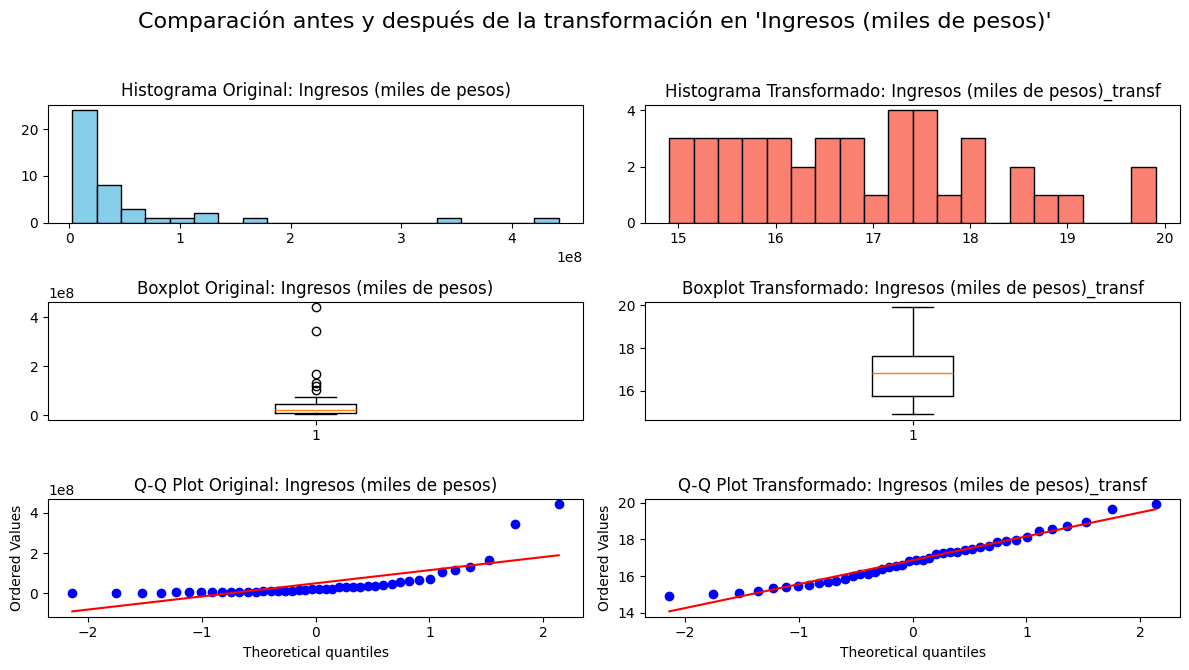

In [ ]:

from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_nacional, "Ingresos (miles de pesos)", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

In [ ]:
columnas_continuas = ["Velocidad (Mbps)"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Acc_vel_loc_sinrangos.columns:
        skew_val = df_internet_Acc_vel_loc_sinrangos[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

Velocidad (Mbps): skewness = 0.69


In [ ]:
columnas_continuas = ["Tot_B_Ancha_Fija_x_Prov","Tot_DialUp_x_Prov","Tot_DialUp_+_B_Ancha_Fija_x_Prov"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Dial_BAf.columns:
        skew_val = df_internet_Dial_BAf[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

Tot_B_Ancha_Fija_x_Prov: skewness = 3.87
Tot_DialUp_x_Prov: skewness = 3.91
Tot_DialUp_+_B_Ancha_Fija_x_Prov: skewness = 3.86


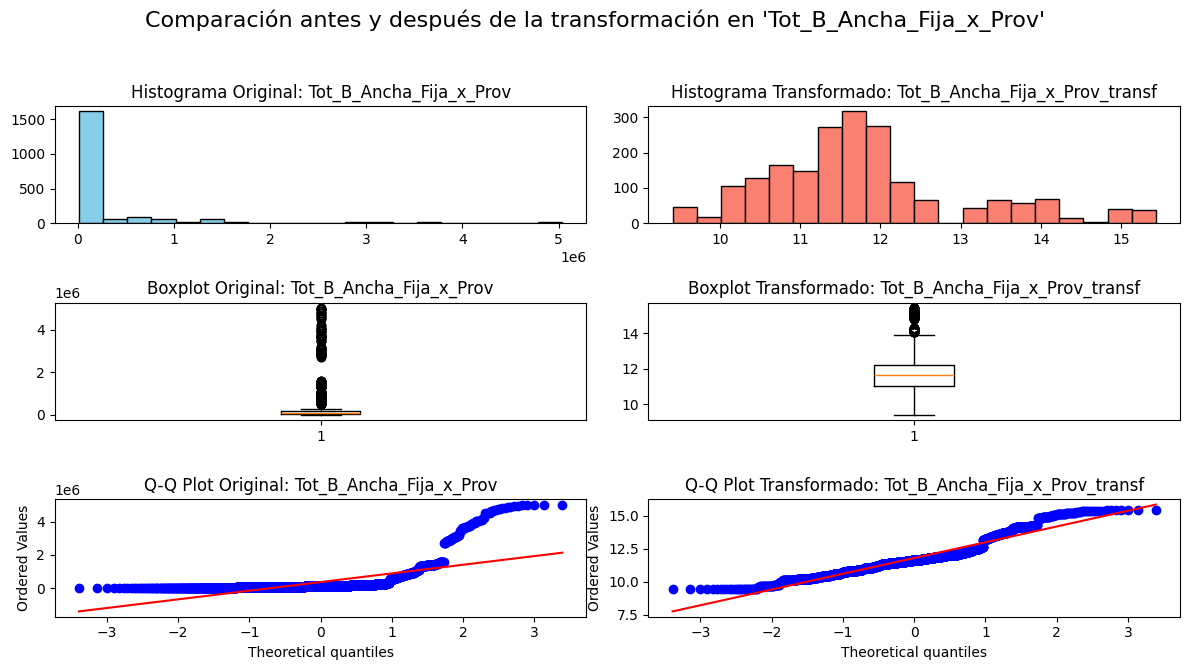

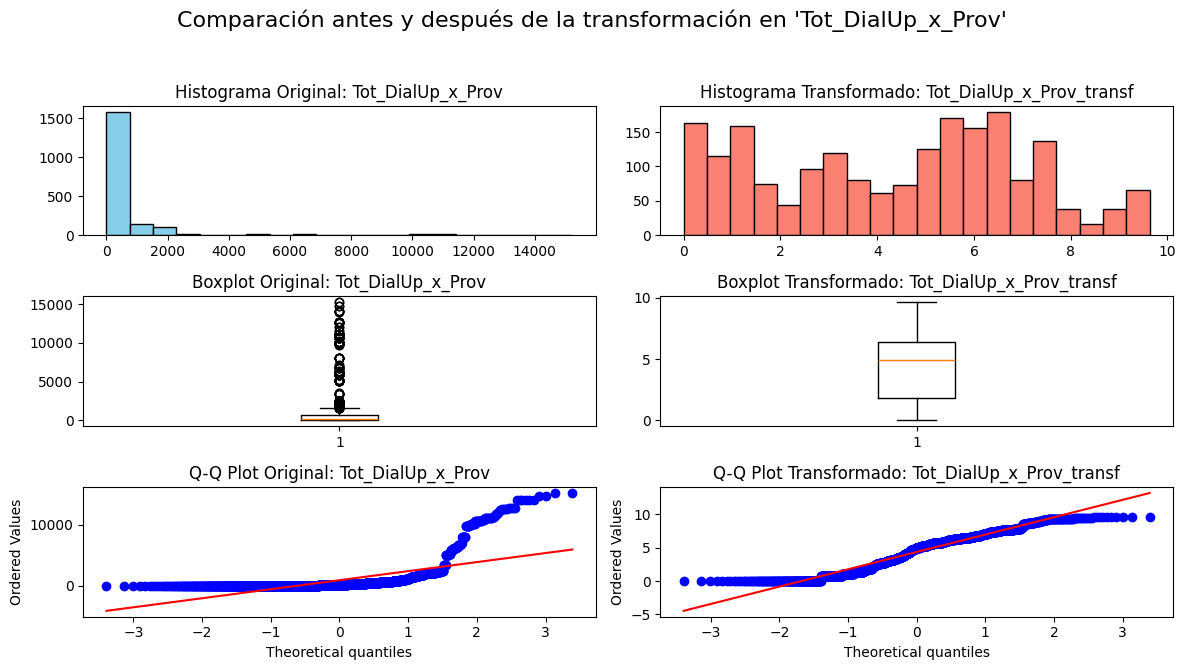

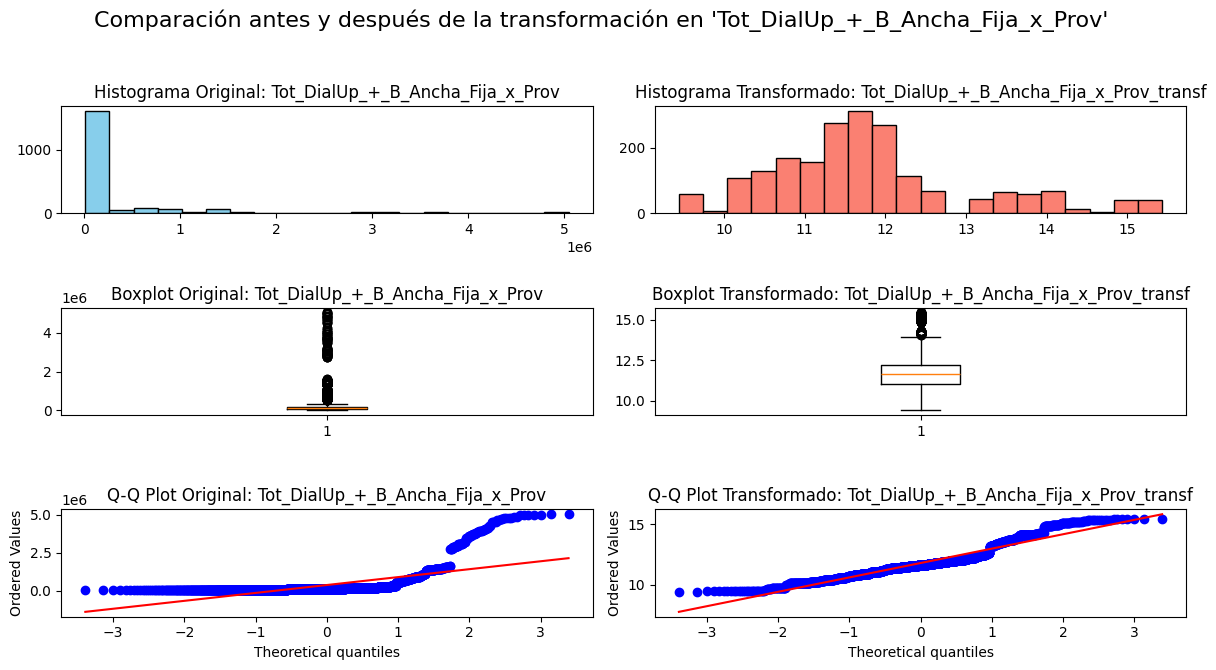

In [ ]:
from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_+_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

1. **Análisis de Series Temporales:**  
   - Graficar la evolución de variables clave (velocidad, accesos, penetración) a lo largo del tiempo, usando "Año" y "Trimestre".  
   - Identificar tendencias, estacionalidad o cambios abruptos en el tiempo.

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).

3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.

4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

4. Conclusiones preliminares
	1.	Principales hallazgos
	    •	Provincias con mayor número de accesos.
	    •	Provincias con mayor velocidad media.
	    •	Evolución temporal de penetración, accesos, etc.
	2.	Problemas detectados
	    •	Columnas con muchos nulos.
	    •	Posibles valores atípicos o inconsistentes.
	    •	Variables que no aportan información o que podrían fusionarse.
	3.	Decisiones para el Dashboard
	    •	Identificar qué métricas se van a mostrar (velocidad, accesos, penetración, ingresos, etc.).
	    •	Definir filtros relevantes (por provincia, año, trimestre).

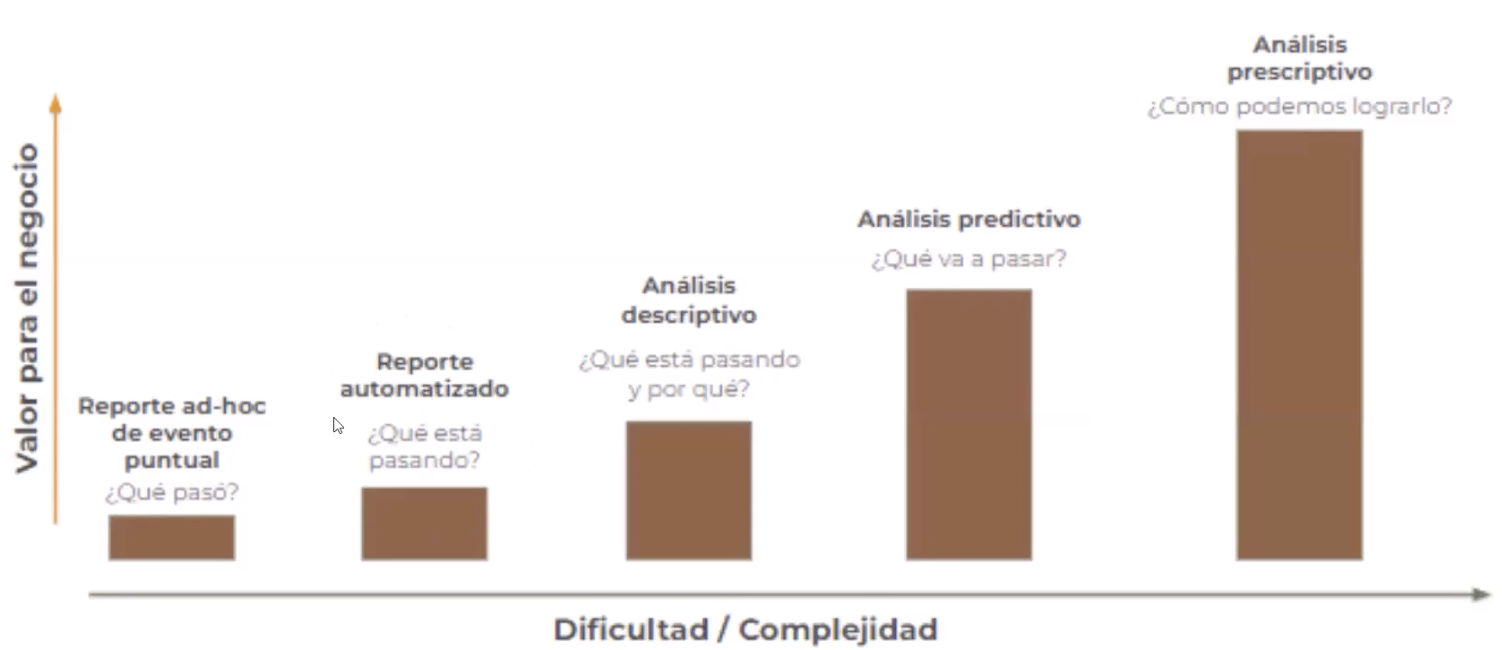

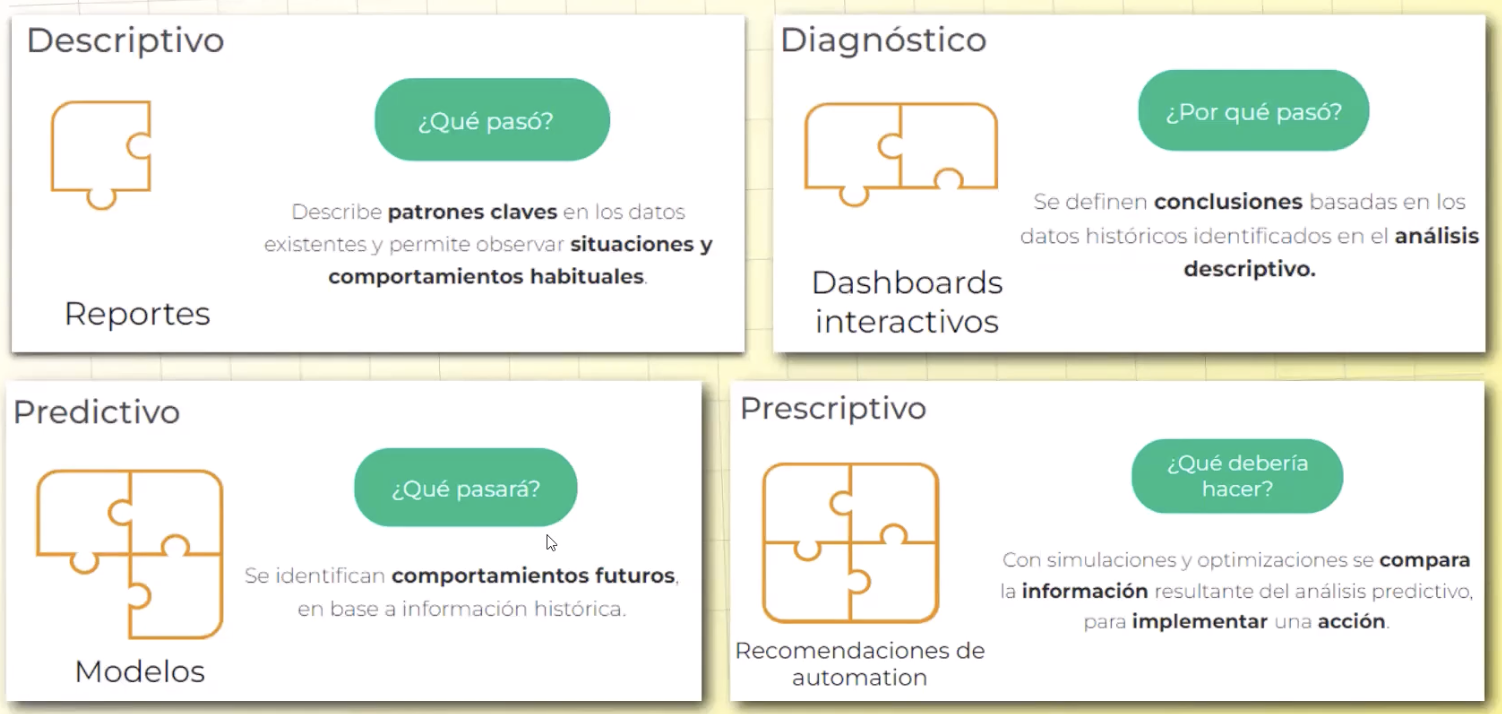